<a href="https://colab.research.google.com/github/sibaysky/MarketSalesForecast/blob/main/DiplomSem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

–ò–º–ø–æ—Ä—Ç pandas –∏ numpy –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏, –∞ —Ç–∞–∫–∂–µ LabelEncoder –∏ StandardScaler –∏–∑ sklearn –¥–ª—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch.nn as nn

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ó–∞–≥—Ä—É–∑–∫–∞ –æ–±—É—á–∞—é—â–µ–≥–æ, —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –∏ —Å–ø—Ä–∞–≤–æ—á–Ω—ã—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ —Å –ø–æ–º–æ—â—å—é pandas.


In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

from google.colab import drive
drive.mount('/content/drive/')

sales = pd.read_csv('/content/drive/MyDrive/dataset/sales_train.csv')
items = pd.read_csv('/content/drive/MyDrive/dataset/items.csv')
item_cats = pd.read_csv('/content/drive/MyDrive/dataset/item_categories.csv')
shops = pd.read_csv('/content/drive/MyDrive/dataset/shops.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

Mounted at /content/drive/


# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –∞–≥—Ä–µ–≥–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

–ê–≥—Ä–µ–≥–∏—Ä—É–µ–º –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –º–µ—Å—è—Ü–∞–º, –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è, –æ–±—ä–µ–¥–∏–Ω—è–µ–º —Å–æ —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∞–º–∏.  
–°–æ–∑–¥–∞–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: —Å—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –∏ —Ü–µ–Ω—ã, –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —É—Ä–æ–≤–Ω–∏, –∫–ª–∞—Å—Å—ã —Å–ø—Ä–æ—Å–∞ –∏ —Ü–µ–Ω.  
–ü—Ä–∏–º–µ–Ω—è–µ–º –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ –º–æ–¥–µ–ª–∏.


In [ ]:
# –ê–≥—Ä–µ–≥–∞—Ü–∏—è: —Å—É–º–º–∏—Ä—É–µ–º –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –º–µ—Å—è—Ü–∞–º
monthly_sales = sales.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg({
    'item_cnt_day': ['sum', 'mean', 'count'],
    'item_price': ['mean', 'max']
})

monthly_sales.columns = ['date_block_num', 'shop_id', 'item_id',
                         'item_cnt_sum', 'item_cnt_mean', 'item_cnt_count',
                         'item_price_mean', 'item_price_max']

# –û–≥—Ä–∞–Ω–∏—á–∏–º –ø—Ä–æ–¥–∞–∂–∏ –¥–æ [0, 20], –∫–∞–∫ —Ç—Ä–µ–±—É–µ—Ç Kaggle
monthly_sales['item_cnt_sum'] = monthly_sales['item_cnt_sum'].clip(0, 20)

# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏
monthly_sales = monthly_sales.merge(items, on='item_id', how='left')
monthly_sales = monthly_sales.merge(item_cats, on='item_category_id', how='left')

# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
for col in ['shop_id', 'item_id', 'item_category_id']:
    le = LabelEncoder()
    monthly_sales[col] = le.fit_transform(monthly_sales[col])

# –ò–Ω–∂–µ–Ω–µ—Ä–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
monthly_sales['item_avg_sales'] = monthly_sales.groupby('item_id')['item_cnt_sum'].transform('mean')
monthly_sales['item_avg_price'] = monthly_sales.groupby('item_id')['item_price_mean'].transform('mean')
monthly_sales['shop_avg_sales'] = monthly_sales.groupby('shop_id')['item_cnt_sum'].transform('mean')

monthly_sales.rename(columns={'item_cnt_sum': 'target'}, inplace=True)
monthly_sales['log_target'] = np.log1p(monthly_sales['target'])

# –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤
def normalize_name(name):
    import re
    name = name.lower()
    name = re.sub(r"[^a-z–∞-—è0-9]+", " ", name)
    name = re.sub(r"\s+", " ", name).strip()
    return name

monthly_sales['normalized_sku_name'] = monthly_sales['item_name'].apply(normalize_name)
monthly_sales['normalized_sku_name'] = LabelEncoder().fit_transform(monthly_sales['normalized_sku_name'])

monthly_sales['sku_level_1_category'] = monthly_sales['item_category_name'].apply(lambda x: x.split(' ')[0])
monthly_sales['sku_level_1_category'] = LabelEncoder().fit_transform(monthly_sales['sku_level_1_category'])

monthly_sales['price_class'] = pd.qcut(monthly_sales['item_avg_price'], 3, labels=False)
monthly_sales['demand_class'] = pd.qcut(monthly_sales['item_avg_sales'], 3, labels=False)

# –°–ø–∏—Å–∫–∏ —Ñ–∏—á–µ–π
cat_features = ['item_id', 'item_category_id', 'normalized_sku_name',
                'sku_level_1_category', 'price_class', 'demand_class']

embed_sizes = {col: monthly_sales[col].nunique() for col in cat_features}
num_features = ['item_cnt_mean', 'item_cnt_count', 'item_price_mean',
                'item_price_max', 'item_avg_sales', 'item_avg_price', 'shop_avg_sales']

#–î–æ–±–∞–≤–∏–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
scaler = StandardScaler()
X_num = scaler.fit_transform(monthly_sales[num_features]).astype(np.float32)

X_cat = monthly_sales[cat_features].values.astype(np.int64)
y = monthly_sales['log_target'].values.astype(np.float32)

#–ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º —Ü–µ–Ω—É
item_price = monthly_sales['item_price_mean'].clip(1e-2)  # –∏–∑–±–µ–≥–∞–µ–º log(0)
price_tensor = item_price.values / item_price.max()
price_tensor = price_tensor.astype(np.float32)

# –ú–æ–¥–µ–ª—å ElasticityModel

–û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤—É—é –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É –Ω–∞ –±–∞–∑–µ `nn.Module` –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ —Å–ø—Ä–æ—Å–∞.  
–ú–æ–¥–µ–ª—å –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö, –∏ –¥–≤–∞ –ª–∏–Ω–µ–π–Ω—ã—Ö –≤—ã—Ö–æ–¥–∞:
- –æ–¥–∏–Ω –¥–ª—è –ª–æ–≥-—Å–ø—Ä–æ—Å–∞ (baseline),
- –≤—Ç–æ—Ä–æ–π ‚Äî –¥–ª—è –ª–æ–≥-–º–Ω–æ–∂–∏—Ç–µ–ª—è —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ (–æ–≥—Ä–∞–Ω–∏—á–µ–Ω —á–µ—Ä–µ–∑ tanh).

–§–∏–Ω–∞–ª—å–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑ –ª–æ–≥-—Å–ø—Ä–æ—Å–∞ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ—Ç—Å—è —Å —É—á–µ—Ç–æ–º –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ —Ü–µ–Ω—ã.


In [ ]:
class ElasticityModel(nn.Module):
    def __init__(self, embed_sizes, num_numerical):
        super().__init__()
        self.embeddings = nn.ModuleDict({
            col: nn.Embedding(n, min(50, (n + 1) // 2)) for col, n in embed_sizes.items()
        })
        emb_dim = sum([emb.embedding_dim for emb in self.embeddings.values()])
        self.bn_num = nn.BatchNorm1d(num_numerical)
        self.fc_num = nn.Linear(num_numerical, 64)
        self.encoder_demand = nn.Linear(emb_dim + 64, 1)
        self.encoder_elasticity = nn.Linear(emb_dim + 64, 1)

    def forward(self, x_cat, x_num, log_price):
        x_emb = [self.embeddings[col](x_cat[:, i]) for i, col in enumerate(embed_sizes)]
        x_emb = torch.cat(x_emb, dim=1)
        x_num = self.bn_num(x_num)
        x_num_proj = F.relu(self.fc_num(x_num))
        x = torch.cat([x_emb, x_num_proj], dim=1)

        log_demand = self.encoder_demand(x)
        raw_mul = self.encoder_elasticity(x)

        # –û–≥—Ä–∞–Ω–∏—á–∏–º log_mul –æ—Ç -5 –¥–æ 5
        log_mul = 5.0 * torch.tanh(raw_mul)

        # –ü—Ä–æ–≥–Ω–æ–∑ –ª–æ–≥-—Å–ø—Ä–æ—Å–∞
        pred = log_demand - log_mul * log_price.view(-1, 1)
        return pred.squeeze()


# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º `TensorDataset` –∏ `DataLoader`.  
–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏, –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ (Adam) –∏ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å (MSE).  
–û–±—É—á–µ–Ω–∏–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ 5 —ç–ø–æ—Ö —Å —Ä–∞—Å—á—ë—Ç–æ–º –∏ –≤—ã–≤–æ–¥–æ–º —Å—Ä–µ–¥–Ω–µ–π –ø–æ—Ç–µ—Ä–∏ –Ω–∞ –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–µ.


In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import torch

X_num_tensor = torch.tensor(X_num)
X_cat_tensor = torch.tensor(X_cat)
y_tensor = torch.tensor(y)
log_price_tensor = torch.tensor(np.log1p(price_tensor))

dataset = TensorDataset(X_cat_tensor, X_num_tensor, log_price_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)

model = ElasticityModel(embed_sizes, X_num.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for epoch in range(1, 6):
    model.train()
    total_loss = 0
    for x_cat_b, x_num_b, log_price_b, y_b in dataloader:
        optimizer.zero_grad()
        pred = model(x_cat_b, x_num_b, log_price_b)
        loss = loss_fn(pred, y_b)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x_cat_b.size(0)
    print(f"Epoch {epoch}, Loss: {total_loss / len(dataloader.dataset):.4f}")


# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫—Ä–∏–≤—ã—Ö —Å–ø—Ä–æ—Å–∞

–°—Ç—Ä–æ–∏–º –∫—Ä–∏–≤—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å–ø—Ä–æ—Å–∞ –æ—Ç —Ü–µ–Ω—ã –¥–ª—è –ø–µ—Ä–≤—ã—Ö 5 —Ç–æ–≤–∞—Ä–æ–≤.  
–î–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–æ–≤–∞—Ä–∞ –≤–∞—Ä—å–∏—Ä—É–µ–º —Ü–µ–Ω—É –∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º —Å–ø—Ä–æ—Å, –æ—Ç–æ–±—Ä–∞–∂–∞—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ.


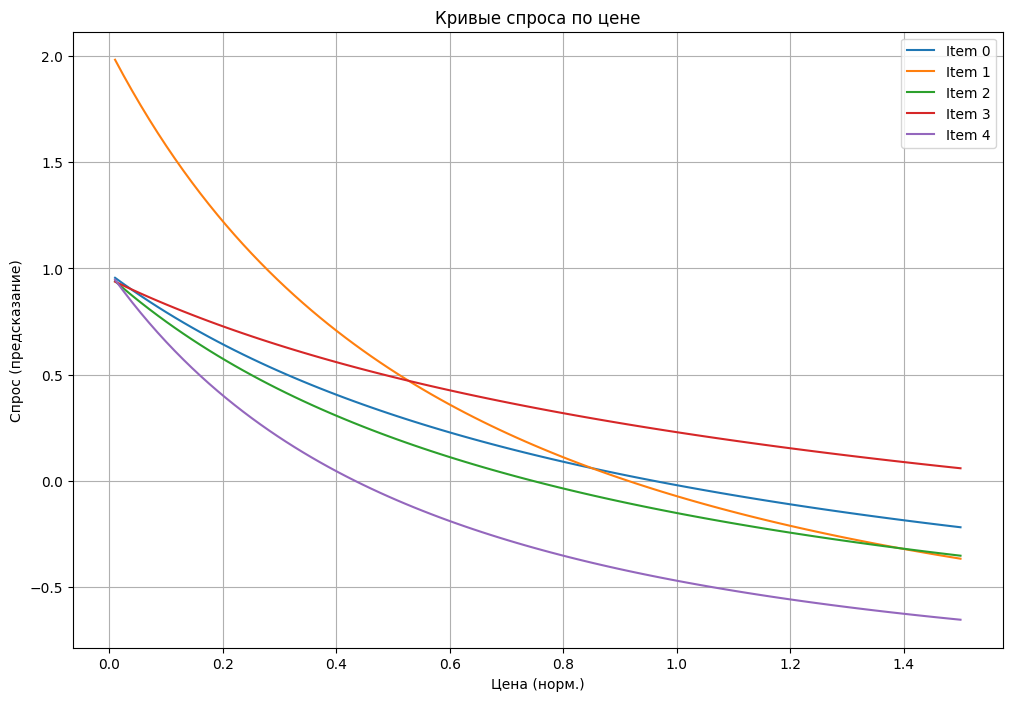

In [ ]:
import matplotlib.pyplot as plt

model.eval()
top_items = np.unique(X_cat_tensor[:, 0].numpy())[:5]  # –ø–µ—Ä–≤—ã–µ 5 item_id (–º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ —Ç–æ–ø –ø–æ –ø—Ä–æ–¥–∞–∂–∞–º)

plt.figure(figsize=(12, 8))
for item_id in top_items:
    # –ù–∞–π–¥—ë–º –ø–µ—Ä–≤—É—é —Å—Ç—Ä–æ–∫—É —Å —ç—Ç–∏–º item_id
    idx = (X_cat_tensor[:, 0] == item_id).nonzero(as_tuple=True)[0][0]

    # –í–æ–∑—å–º—ë–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∏ —á–∏—Å–ª–æ–≤—ã–µ —Ñ–∏—á–∏
    x_cat_base = X_cat_tensor[idx].unsqueeze(0).repeat(100, 1)
    x_num_base = X_num_tensor[idx].unsqueeze(0).repeat(100, 1)

    # –†–∞–∑–Ω—ã–µ —Ü–µ–Ω—ã –≤ –ª–æ–≥-–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ
    prices = np.linspace(0.01, 1.5, 100)
    log_prices = torch.tensor(np.log1p(prices), dtype=torch.float32)

    preds = model(x_cat_base, x_num_base, log_prices).detach().numpy()
    demand = np.expm1(preds)  # –ø–µ—Ä–µ–≤–æ–¥–∏–º –∏–∑ log(1 + y)

    plt.plot(prices, demand, label=f"Item {item_id}")

plt.xlabel("–¶–µ–Ω–∞ (–Ω–æ—Ä–º.)")
plt.ylabel("–°–ø—Ä–æ—Å (–ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ)")
plt.title("–ö—Ä–∏–≤—ã–µ —Å–ø—Ä–æ—Å–∞ –ø–æ —Ü–µ–Ω–µ")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
elasticities = []
for i in range(len(X_cat_tensor)):
    with torch.no_grad():
        x_cat_b = X_cat_tensor[i].unsqueeze(0)
        x_num_b = X_num_tensor[i].unsqueeze(0)
        log_price_b = log_price_tensor[i].unsqueeze(0)

        x_emb = [model.embeddings[col](x_cat_b[:, j]) for j, col in enumerate(embed_sizes)]
        x_emb = torch.cat(x_emb, dim=1)
        x_num_proj = F.relu(model.fc_num(model.bn_num(x_num_b)))
        x = torch.cat([x_emb, x_num_proj], dim=1)

        elasticity = 5.0 * torch.tanh(model.encoder_elasticity(x))  # bounded
        elasticities.append(elasticity.item())

plt.hist(elasticities, bins=50)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏")
plt.xlabel("–≠–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–≤–∞—Ä–æ–≤")
plt.grid(True)
plt.show()


# –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏

–ò–∑–≤–ª–µ–∫–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ –∏–∑ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –¥–ª—è –≤—Å–µ—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π.  
–°—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É, —á—Ç–æ–±—ã –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ —Å–ø—Ä–æ—Å–∞ –ø–æ —Ç–æ–≤–∞—Ä–∞–º.


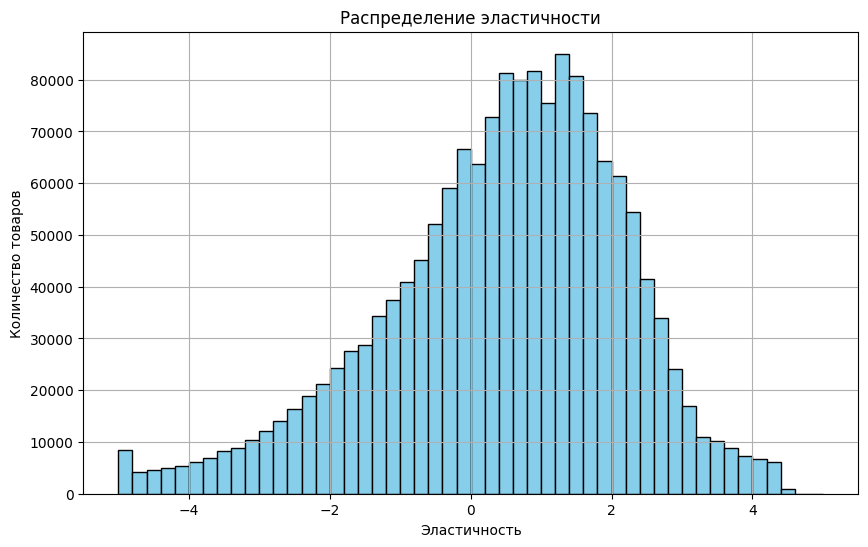

In [ ]:
import torch.nn.functional as F

# –ü–æ–ª—É—á–∞–µ–º –≤—ã—Ö–æ–¥—ã –º–æ–¥–µ–ª–∏
with torch.no_grad():
    # –ü—Ä–æ–≥–æ–Ω—è–µ–º –≤—Å—ë —Å—Ä–∞–∑—É
    x_emb = [model.embeddings[col](X_cat_tensor[:, j]) for j, col in enumerate(embed_sizes)]
    x_emb = torch.cat(x_emb, dim=1)
    x_num_proj = F.relu(model.fc_num(model.bn_num(X_num_tensor)))
    x = torch.cat([x_emb, x_num_proj], dim=1)

    elasticities = 5.0 * torch.tanh(model.encoder_elasticity(x)).squeeze().numpy()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 6))
plt.hist(elasticities, bins=50, color="skyblue", edgecolor="black")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏")
plt.xlabel("–≠–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–≤–∞—Ä–æ–≤")
plt.grid(True)
plt.show()


# –ê–Ω–∞–ª–∏–∑ –∫—Ä–∏–≤—ã—Ö –ø—Ä–∏–±—ã–ª–∏

–ù–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ —Å–ø—Ä–æ—Å–∞ –∏ –∑–∞–¥–∞–Ω–Ω–æ–π —Å–µ–±–µ—Å—Ç–æ–∏–º–æ—Å—Ç–∏ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –ø—Ä–∏–±—ã–ª—å –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Ü–µ–Ω.  
–°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–±—ã–ª–∏ –æ—Ç —Ü–µ–Ω—ã –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤.


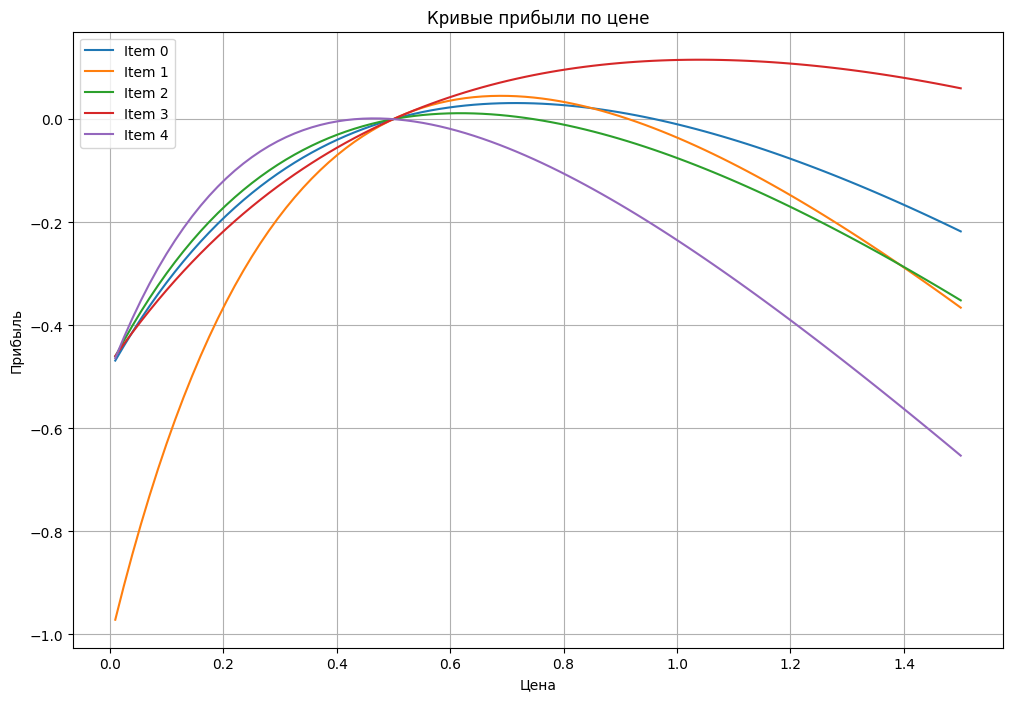

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# –ü—Ä–∏–º–µ—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–µ–±–µ—Å—Ç–æ–∏–º–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–æ–≤–∞—Ä–∞
costs = {item_id: 0.5 for item_id in top_items}  # –ó–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

plt.figure(figsize=(12, 8))
for item_id in top_items:
    # –ù–∞–π–¥—ë–º –ø–µ—Ä–≤—É—é —Å—Ç—Ä–æ–∫—É —Å —ç—Ç–∏–º item_id
    idx = (X_cat_tensor[:, 0] == item_id).nonzero(as_tuple=True)[0][0]

    # –í–æ–∑—å–º—ë–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∏ —á–∏—Å–ª–æ–≤—ã–µ —Ñ–∏—á–∏
    x_cat_base = X_cat_tensor[idx].unsqueeze(0).repeat(100, 1)
    x_num_base = X_num_tensor[idx].unsqueeze(0).repeat(100, 1)

    # –†–∞–∑–Ω—ã–µ —Ü–µ–Ω—ã
    prices = np.linspace(0.01, 1.5, 100)
    log_prices = torch.tensor(np.log1p(prices), dtype=torch.float32)

    preds = model(x_cat_base, x_num_base, log_prices).detach().numpy()
    demand = np.expm1(preds)  # –ø–µ—Ä–µ–≤–æ–¥–∏–º –∏–∑ log(1 + y)

    profit = (prices - costs[item_id]) * demand
    plt.plot(prices, profit, label=f"Item {item_id}")

plt.xlabel("–¶–µ–Ω–∞")
plt.ylabel("–ü—Ä–∏–±—ã–ª—å")
plt.title("–ö—Ä–∏–≤—ã–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ —Ü–µ–Ω–µ")
plt.legend()
plt.grid(True)
plt.show()


# –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

–û–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è —Ä–∞—Å—á—ë—Ç–∞ –∫–ª—é—á–µ–≤—ã—Ö –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞:  
- R¬≤ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏)  
- MAE (—Å—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞)  
- MAPE (—Å—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è –æ—à–∏–±–∫–∞)  

–§—É–Ω–∫—Ü–∏—è `evaluate_metrics` –≤—ã–≤–æ–¥–∏—Ç –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_idx = y_true != 0
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred[nonzero_idx]) / y_true[nonzero_idx])) * 100

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –≤—Å–µ—Ö –º–µ—Ç—Ä–∏–∫
def evaluate_metrics(y_true, y_pred, name='Model'):
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"[{name}] R2: {r2:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")
    return r2, mae, mape


# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏

–†–∞–∑–±–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –≤ –ø—Ä–æ–ø–æ—Ä—Ü–∏–∏ 80/20 –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏.  
–°–æ–∑–¥–∞–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ `TensorDataset` –∏ `DataLoader` –¥–ª—è —É–¥–æ–±–Ω–æ–π –ø–æ–¥–∞—á–∏ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ.


In [ ]:
# –î–æ–ø—É—Å—Ç–∏–º 80% train, 20% test
from sklearn.model_selection import train_test_split

X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test, log_price_train, log_price_test = train_test_split(
    X_cat_tensor, X_num_tensor, y_tensor, log_price_tensor, test_size=0.2, random_state=42
)

train_dataset = TensorDataset(X_cat_train, X_num_train, log_price_train, y_train)
test_dataset = TensorDataset(X_cat_test, X_num_test, log_price_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)


# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏, –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ –∏ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å.  
–û–±—É—á–µ–Ω–∏–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ 5 —ç–ø–æ—Ö —Å –ø–æ–¥—Å—á–µ—Ç–æ–º —Å—Ä–µ–¥–Ω–µ–π –æ—à–∏–±–∫–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.


In [ ]:
model = ElasticityModel(embed_sizes, X_num.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for epoch in range(1, 6):
    model.train()
    total_loss = 0
    for x_cat_b, x_num_b, log_price_b, y_b in train_loader:
        optimizer.zero_grad()
        pred = model(x_cat_b, x_num_b, log_price_b)
        loss = loss_fn(pred, y_b)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x_cat_b.size(0)
    print(f"Epoch {epoch}, Loss: {total_loss / len(train_loader.dataset):.4f}")


Epoch 1, Loss: 0.0265
Epoch 2, Loss: 0.0051
Epoch 3, Loss: 0.0046
Epoch 4, Loss: 0.0039
Epoch 5, Loss: 0.0035


# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

–í —Ä–µ–∂–∏–º–µ –æ—Ü–µ–Ω–∫–∏ –ø–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –≤—ã—á–∏—Å–ª—è–µ–º –∫–ª—é—á–µ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏.


In [ ]:
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for x_cat_b, x_num_b, log_price_b, y_b in test_loader:
        pred = model(x_cat_b, x_num_b, log_price_b)
        y_pred.append(pred.cpu().numpy())
        y_true.append(y_b.cpu().numpy())

y_pred = np.concatenate(y_pred)
y_true = np.concatenate(y_true)

# –ú–µ—Ç—Ä–∏–∫–∏ –º–æ–¥–µ–ª–∏
evaluate_metrics(y_true, y_pred, name='ElasticityModel')


[ElasticityModel] R2: 0.9886, MAE: 0.0274, MAPE: 2.82%


(0.9885522127151489, 0.02741941064596176, np.float32(2.8179493))

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å —Ç—Ä–∏–≤–∏–∞–ª—å–Ω—ã–º –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–º

–ò—Å–ø–æ–ª—å–∑—É–µ–º —Å–¥–≤–∏–Ω—É—Ç—ã–µ –Ω–∞ –æ–¥–∏–Ω —à–∞–≥ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞–∫ –±–∞–∑–æ–≤—ã–π –ø—Ä–æ–≥–Ω–æ–∑.  
–í—ã—á–∏—Å–ª—è–µ–º –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è —Ç—Ä–∏–≤–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–∞ –∏ —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –º–æ–¥–µ–ª–∏.


In [ ]:
# –¢—Ä–∏–≤–∏–∞–ª—å–Ω—ã–π –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä: –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º —á—Ç–æ —Å–ø—Ä–æ—Å —Ç–∞–∫–æ–π –∂–µ –∫–∞–∫ –≤—á–µ—Ä–∞
y_trivial = np.roll(y_true, 1)
y_trivial[0] = y_trivial[1]  # —á—Ç–æ–±—ã –Ω–µ –±—ã–ª–æ –º—É—Å–æ—Ä–∞ –≤ –Ω–∞—á–∞–ª–µ

# –ú–µ—Ç—Ä–∏–∫–∏ —Ç—Ä–∏–≤–∏–∞–ª—å–Ω–æ–≥–æ
evaluate_metrics(y_true, y_trivial, name='Trivial Predictor')

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ
model_mape = mean_absolute_percentage_error(y_true, y_pred)
trivial_mape = mean_absolute_percentage_error(y_true, y_trivial)

print(f"–û—Ç–Ω–æ—à–µ–Ω–∏–µ –æ—à–∏–±–æ–∫: –ú–æ—è –º–æ–¥–µ–ª—å / –¢—Ä–∏–≤–∏–∞–ª—å–Ω—ã–π = {model_mape / trivial_mape:.4f}")


[Trivial Predictor] R2: -0.9974, MAE: 0.4011, MAPE: 39.38%
–û—Ç–Ω–æ—à–µ–Ω–∏–µ –æ—à–∏–±–æ–∫: –ú–æ—è –º–æ–¥–µ–ª—å / –¢—Ä–∏–≤–∏–∞–ª—å–Ω—ã–π = 0.0716


# –ú–æ–¥–µ–ª—å –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Å–ø—Ä–æ—Å–∞ —Å —É—á–µ—Ç–æ–º —Ü–µ–Ω–æ–≤–æ–π —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏

–í –¥–∞–Ω–Ω–æ–º –Ω–æ—É—Ç–±—É–∫–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–∞ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è —Å–ø—Ä–æ—Å–∞ –Ω–∞ —Ç–æ–≤–∞—Ä—ã —Å —É—á–µ—Ç–æ–º –≤–ª–∏—è–Ω–∏—è —Ü–µ–Ω—ã (—Ü–µ–Ω–æ–≤–æ–π —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏). –ü–æ–¥—Ö–æ–¥ –æ—Å–Ω–æ–≤–∞–Ω –Ω–∞ –¥–≤—É—Ö–º–æ–¥–µ–ª—å–Ω–æ–π –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–µ:

1. **–ë–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å —Å–ø—Ä–æ—Å–∞** ‚Äî –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –ª–æ–≥–∞—Ä–∏—Ñ–º —Å–ø—Ä–æ—Å–∞ –±–µ–∑ —É—á–µ—Ç–∞ —Ü–µ–Ω—ã.
2. **–ú–æ–¥–µ–ª—å —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏** ‚Äî –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç, –∫–∞–∫ –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ü–µ–Ω—ã –≤–ª–∏—è–µ—Ç –Ω–∞ —Å–ø—Ä–æ—Å.

–ú–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è –Ω–∞ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏—Ö –ø—Ä–æ–¥–∞–∂–∞—Ö –∏ —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∞—Ö —Ç–æ–≤–∞—Ä–æ–≤ –∏ –º–∞–≥–∞–∑–∏–Ω–æ–≤. –ò—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –∫–∞–∫ —á–∏—Å–ª–æ–≤—ã–µ, —Ç–∞–∫ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–≤–∫–ª—é—á–∞—è —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –∏–µ—Ä–∞—Ä—Ö–∏–∏ –∏ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏).

–û—Å–Ω–æ–≤–Ω—ã–µ —ç—Ç–∞–ø—ã:
- –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö (`sales`, `items`, `categories`, `shops`, `test`)
- –ò–Ω–∂–µ–Ω–µ—Ä–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: –∞–≥—Ä–µ–≥–∞—Ü–∏–∏, –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤, —Å–æ–∑–¥–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
- –û–±—É—á–µ–Ω–∏–µ –¥–≤—É—Ö –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ LightGBM
- –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫—Ä–∏–≤—ã—Ö —Å–ø—Ä–æ—Å–∞ –¥–ª—è —Ç–æ–ø-—Ç–æ–≤–∞—Ä–æ–≤
- –ê–Ω–∞–ª–∏–∑ —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º

–ú–æ–¥–µ–ª—å –ø–æ–∑–≤–æ–ª—è–µ—Ç:
- –°—Ç—Ä–æ–∏—Ç—å –ø—Ä–æ–≥–Ω–æ–∑ —Å–ø—Ä–æ—Å–∞ –ø—Ä–∏ —Ä–∞–∑–Ω—ã—Ö —É—Ä–æ–≤–Ω—è—Ö —Ü–µ–Ω—ã
- –í—ã—è–≤–ª—è—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å –≤—ã—Å–æ–∫–æ–π –∏–ª–∏ –Ω–∏–∑–∫–æ–π —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é –∫ —Ü–µ–Ω–µ
- –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ —Ü–µ–Ω –∏ –ø–æ–≤—ã—à–µ–Ω–∏—è –ø—Ä–∏–±—ã–ª–∏


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
–†–∞–∑–º–µ—Ä—ã –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:
Sales: (2935849, 6)
Items: (22170, 3)
Categories: (84, 2)
Shops: (60, 2)
Test: (214200, 3)
–†–∞–∑–º–µ—Ä –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: (1609124, 14)
–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: (1609124, 46)
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 41
Train shape: (1577593, 41)
Validation shape: (31531, 41)
Training until validation scores don't improve for 50 rounds
[100]	train's rmse: 0.0883509	eval's rmse: 0.107795
[200]	train's rmse: 0.0474592	eval's rmse: 0.0635231
[300]	train's rmse: 0.0379556	eval's rmse: 0.0519857
[400]	train's rmse: 0.0337162	eval's rmse: 0.0481062
[500]	train's rmse: 0.0316859	eval's rmse: 0.0466351
[600]	train's rmse: 0.0297324	eval's rmse: 0.0451698
[700]	train's rmse: 0.0281652	eval's rmse: 0.0436794
[800]	train's rmse: 0.0271887	eval's rmse: 0.0430432
[900]	train's rmse: 0.026371	eva

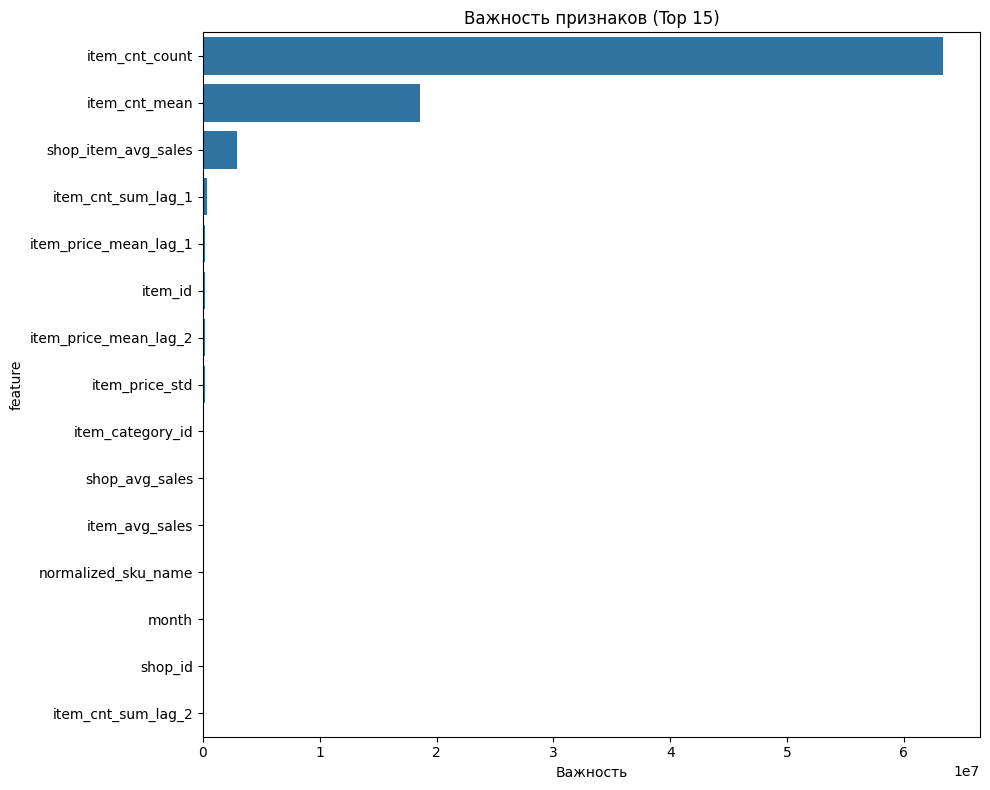

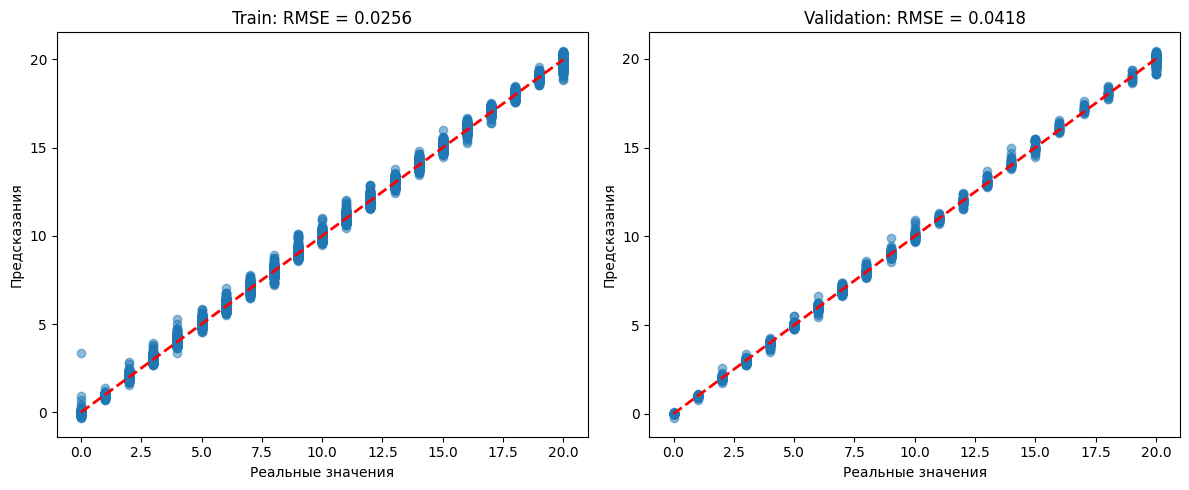


–¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º–∏ –æ—à–∏–±–∫–∞–º–∏:
                  mean_error  std_error  count  avg_sales
item_category_id                                         
78                     0.260        NaN      1      0.000
22                     0.063      0.143     63      2.540
83                     0.040      0.067     10     13.900
28                    -0.017      0.011      5     20.000
19                    -0.015      0.019      2      4.500
69                     0.013      0.084     40     19.200
82                     0.011      0.096    102      3.412
29                     0.010      0.062    140      4.736
77                    -0.010      0.070     39     11.897
17                     0.007      0.069    623      1.912


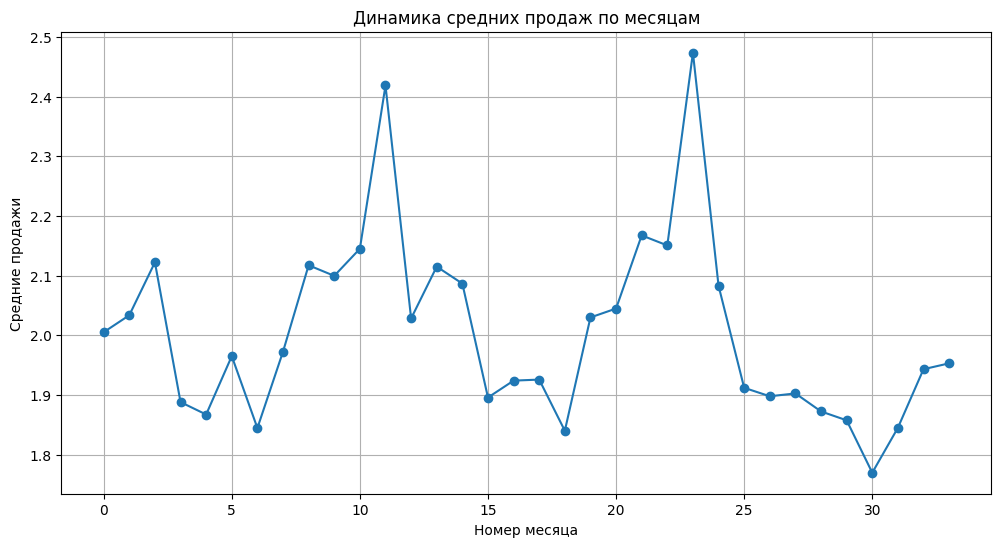


–ú–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ –≥–æ—Ç–æ–≤–∞ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é!
–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é predict_sales() –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ /content/drive/MyDrive/lgb_sales_model.txt


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
from google.colab import drive
drive.mount('/content/drive/')

sales = pd.read_csv('/content/drive/MyDrive/dataset/sales_train.csv')
items = pd.read_csv('/content/drive/MyDrive/dataset/items.csv')
item_cats = pd.read_csv('/content/drive/MyDrive/dataset/item_categories.csv')
shops = pd.read_csv('/content/drive/MyDrive/dataset/shops.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

print("–†–∞–∑–º–µ—Ä—ã –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:")
print(f"Sales: {sales.shape}")
print(f"Items: {items.shape}")
print(f"Categories: {item_cats.shape}")
print(f"Shops: {shops.shape}")
print(f"Test: {test.shape}")

# –ê–≥—Ä–µ–≥–∞—Ü–∏—è: —Å—É–º–º–∏—Ä—É–µ–º –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –º–µ—Å—è—Ü–∞–º
monthly_sales = sales.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg({
    'item_cnt_day': ['sum', 'mean', 'count'],
    'item_price': ['mean', 'max', 'min', 'std']
})

monthly_sales.columns = ['date_block_num', 'shop_id', 'item_id',
                         'item_cnt_sum', 'item_cnt_mean', 'item_cnt_count',
                         'item_price_mean', 'item_price_max', 'item_price_min', 'item_price_std']

# –ó–∞–ø–æ–ª–Ω—è–µ–º NaN –≤ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–∏ —Ü–µ–Ω—ã
monthly_sales['item_price_std'] = monthly_sales['item_price_std'].fillna(0)

# –û–≥—Ä–∞–Ω–∏—á–∏–º –ø—Ä–æ–¥–∞–∂–∏ –¥–æ [0, 20], –∫–∞–∫ —Ç—Ä–µ–±—É–µ—Ç Kaggle
monthly_sales['item_cnt_sum'] = monthly_sales['item_cnt_sum'].clip(0, 20)

# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏
monthly_sales = monthly_sales.merge(items, on='item_id', how='left')
monthly_sales = monthly_sales.merge(item_cats, on='item_category_id', how='left')
monthly_sales = monthly_sales.merge(shops, on='shop_id', how='left')

print(f"–†–∞–∑–º–µ—Ä –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: {monthly_sales.shape}")

# –°–æ–∑–¥–∞–µ–º –ª–∞–≥–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–≤–∞–∂–Ω–æ –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤)
def create_lag_features(df, lag_cols, lags):
    """–°–æ–∑–¥–∞–µ—Ç –ª–∞–≥–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏"""
    df_lag = df.copy()

    for col in lag_cols:
        for lag in lags:
            df_lag[f'{col}_lag_{lag}'] = df_lag.groupby(['shop_id', 'item_id'])[col].shift(lag)

    return df_lag

# –°–æ–∑–¥–∞–µ–º –ª–∞–≥–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 3 –º–µ—Å—è—Ü–µ–≤
lag_features = ['item_cnt_sum', 'item_price_mean']
lags = [1, 2, 3]

monthly_sales = create_lag_features(monthly_sales, lag_features, lags)

# –°–æ–∑–¥–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ
def create_rolling_features(df, cols, windows):
    """–°–æ–∑–¥–∞–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ"""
    df_roll = df.copy()

    for col in cols:
        for window in windows:
            df_roll[f'{col}_rolling_mean_{window}'] = df_roll.groupby(['shop_id', 'item_id'])[col].rolling(window=window).mean().values
            df_roll[f'{col}_rolling_std_{window}'] = df_roll.groupby(['shop_id', 'item_id'])[col].rolling(window=window).std().values

    return df_roll

# –°–æ–∑–¥–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ
rolling_cols = ['item_cnt_sum', 'item_price_mean']
windows = [2, 3, 6]

monthly_sales = create_rolling_features(monthly_sales, rolling_cols, windows)

# –ò–Ω–∂–µ–Ω–µ—Ä–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
monthly_sales['item_avg_sales'] = monthly_sales.groupby('item_id')['item_cnt_sum'].transform('mean')
monthly_sales['item_avg_price'] = monthly_sales.groupby('item_id')['item_price_mean'].transform('mean')
monthly_sales['shop_avg_sales'] = monthly_sales.groupby('shop_id')['item_cnt_sum'].transform('mean')
monthly_sales['category_avg_sales'] = monthly_sales.groupby('item_category_id')['item_cnt_sum'].transform('mean')

# –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è
monthly_sales['shop_item_avg_sales'] = monthly_sales.groupby(['shop_id', 'item_id'])['item_cnt_sum'].transform('mean')
monthly_sales['shop_category_avg_sales'] = monthly_sales.groupby(['shop_id', 'item_category_id'])['item_cnt_sum'].transform('mean')

# –í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
monthly_sales['month'] = monthly_sales['date_block_num'] % 12
monthly_sales['year'] = monthly_sales['date_block_num'] // 12
monthly_sales['quarter'] = monthly_sales['month'] // 3

# –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤
def normalize_name(name):
    import re
    if pd.isna(name):
        return "unknown"
    name = str(name).lower()
    name = re.sub(r"[^a-z–∞-—è0-9]+", " ", name)
    name = re.sub(r"\s+", " ", name).strip()
    return name

monthly_sales['normalized_sku_name'] = monthly_sales['item_name'].apply(normalize_name)
monthly_sales['normalized_shop_name'] = monthly_sales['shop_name'].apply(normalize_name)

# –°–æ–∑–¥–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–µ—Ä–≤–æ–≥–æ —É—Ä–æ–≤–Ω—è
monthly_sales['sku_level_1_category'] = monthly_sales['item_category_name'].apply(
    lambda x: x.split(' ')[0] if pd.notna(x) else 'unknown'
)

# –°–æ–∑–¥–∞–µ–º —Ü–µ–Ω–æ–≤—ã–µ –∏ demand –∫–ª–∞—Å—Å—ã
monthly_sales['price_class'] = pd.qcut(monthly_sales['item_avg_price'], 5, labels=False, duplicates='drop')
monthly_sales['demand_class'] = pd.qcut(monthly_sales['item_avg_sales'], 5, labels=False, duplicates='drop')

# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
categorical_features = ['shop_id', 'item_id', 'item_category_id', 'normalized_sku_name',
                       'normalized_shop_name', 'sku_level_1_category']

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    monthly_sales[col] = le.fit_transform(monthly_sales[col].astype(str))
    label_encoders[col] = le

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
monthly_sales = monthly_sales.fillna(0)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏
feature_columns = (
    categorical_features +
    ['item_cnt_mean', 'item_cnt_count', 'item_price_mean', 'item_price_max',
     'item_price_min', 'item_price_std', 'item_avg_sales', 'item_avg_price',
     'shop_avg_sales', 'category_avg_sales', 'shop_item_avg_sales',
     'shop_category_avg_sales', 'month', 'year', 'quarter', 'price_class', 'demand_class'] +
    [col for col in monthly_sales.columns if 'lag_' in col or 'rolling_' in col]
)

# –£–±–∏—Ä–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å NaN –ø–æ—Å–ª–µ —Å–æ–∑–¥–∞–Ω–∏—è –ª–∞–≥–æ–≤ (–ø–µ—Ä–≤—ã–µ –º–µ—Å—è—Ü—ã)
monthly_sales_clean = monthly_sales.dropna()

print(f"–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: {monthly_sales_clean.shape}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {len(feature_columns)}")

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
X = monthly_sales_clean[feature_columns]
y = monthly_sales_clean['item_cnt_sum']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/validation –ø–æ –≤—Ä–µ–º–µ–Ω–∏ (–∫–∞–∫ –≤ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–∏)
# –ü–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü - validation, –æ—Å—Ç–∞–ª—å–Ω—ã–µ - train
max_date_block = monthly_sales_clean['date_block_num'].max()
train_mask = monthly_sales_clean['date_block_num'] < max_date_block
val_mask = monthly_sales_clean['date_block_num'] == max_date_block

X_train = X[train_mask]
y_train = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

# –û–±—É—á–µ–Ω–∏–µ LightGBM
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

# –°–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç—ã –¥–ª—è LightGBM
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
val_data = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_features, reference=train_data)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å —Å early stopping
model = lgb.train(
    lgb_params,
    train_data,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'eval'],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)]
)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

# –ú–µ—Ç—Ä–∏–∫–∏
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
train_mae = mean_absolute_error(y_train, y_pred_train)
val_mae = mean_absolute_error(y_val, y_pred_val)

print(f"\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–∏:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Validation MAE: {val_mae:.4f}")

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importance(importance_type='gain')
}).sort_values('importance', ascending=False)

print(f"\n–¢–æ–ø-15 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
print(feature_importance.head(15))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), y='feature', x='importance')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (Top 15)')
plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å')
plt.tight_layout()
plt.show()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π vs —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.title(f'Train: RMSE = {train_rmse:.4f}')

plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.title(f'Validation: RMSE = {val_rmse:.4f}')

plt.tight_layout()
plt.show()

# –ê–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º —Ç–æ–≤–∞—Ä–æ–≤
val_results = monthly_sales_clean[val_mask].copy()
val_results['predictions'] = y_pred_val
val_results['residuals'] = val_results['item_cnt_sum'] - val_results['predictions']

# –û—à–∏–±–∫–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
category_errors = val_results.groupby('item_category_id').agg({
    'residuals': ['mean', 'std', 'count'],
    'item_cnt_sum': 'mean'
}).round(3)

category_errors.columns = ['mean_error', 'std_error', 'count', 'avg_sales']
category_errors = category_errors.sort_values('mean_error', key=abs, ascending=False)

print(f"\n–¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º–∏ –æ—à–∏–±–∫–∞–º–∏:")
print(category_errors.head(10))

# –ê–Ω–∞–ª–∏–∑ –ø—Ä–æ–¥–∞–∂ –≤–æ –≤—Ä–µ–º–µ–Ω–∏
plt.figure(figsize=(12, 6))
monthly_avg = monthly_sales_clean.groupby('date_block_num')['item_cnt_sum'].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.xlabel('–ù–æ–º–µ—Ä –º–µ—Å—è—Ü–∞')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏')
plt.title('–î–∏–Ω–∞–º–∏–∫–∞ —Å—Ä–µ–¥–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂ –ø–æ –º–µ—Å—è—Ü–∞–º')
plt.grid(True)
plt.show()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
def predict_sales(model, data, feature_columns, label_encoders):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø—Ä–æ–¥–∞–∂ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    """
    # –ü–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
    data_processed = data.copy()

    # –ü—Ä–∏–º–µ–Ω—è–µ–º —Ç–µ –∂–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
    for col, le in label_encoders.items():
        if col in data_processed.columns:
            # –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –Ω–æ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
            mask = data_processed[col].isin(le.classes_)
            data_processed.loc[~mask, col] = 'unknown'

            # –î–æ–±–∞–≤–ª—è–µ–º 'unknown' –≤ –∫–ª–∞—Å—Å—ã –µ—Å–ª–∏ –µ–≥–æ –Ω–µ—Ç
            if 'unknown' not in le.classes_:
                le.classes_ = np.append(le.classes_, 'unknown')

            data_processed[col] = le.transform(data_processed[col].astype(str))

    # –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
    data_processed = data_processed.fillna(0)

    # –í—ã–±–∏—Ä–∞–µ–º –Ω—É–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    X_new = data_processed[feature_columns]

    # –ü—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º
    predictions = model.predict(X_new, num_iteration=model.best_iteration)

    return predictions

print(f"\n–ú–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ –≥–æ—Ç–æ–≤–∞ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é!")
print(f"–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é predict_sales() –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.")

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ)
model.save_model('/content/drive/MyDrive/lgb_sales_model.txt')
print(f"–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ /content/drive/MyDrive/lgb_sales_model.txt")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
–†–∞–∑–º–µ—Ä—ã –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:
Sales: (2935849, 6)
Items: (22170, 3)
Categories: (84, 2)
Shops: (60, 2)
Test: (214200, 3)
–†–∞–∑–º–µ—Ä –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: (1609124, 14)
–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: (1609124, 46)
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 41
Train shape: (1577593, 41)
Validation shape: (31531, 41)
Training until validation scores don't improve for 50 rounds
[100]	train's rmse: 0.0883509	eval's rmse: 0.107795
[200]	train's rmse: 0.0474592	eval's rmse: 0.0635231
[300]	train's rmse: 0.0379556	eval's rmse: 0.0519857
[400]	train's rmse: 0.0337162	eval's rmse: 0.0481062
[500]	train's rmse: 0.0316859	eval's rmse: 0.0466351
[600]	train's rmse: 0.0297324	eval's rmse: 0.0451698
[700]	train's rmse: 0.0281652	eval's rmse: 0.0436794
[800]	train's rmse: 0.0271887	eval's rmse: 0.0430432
[900]	train's rmse: 0.026371	eva

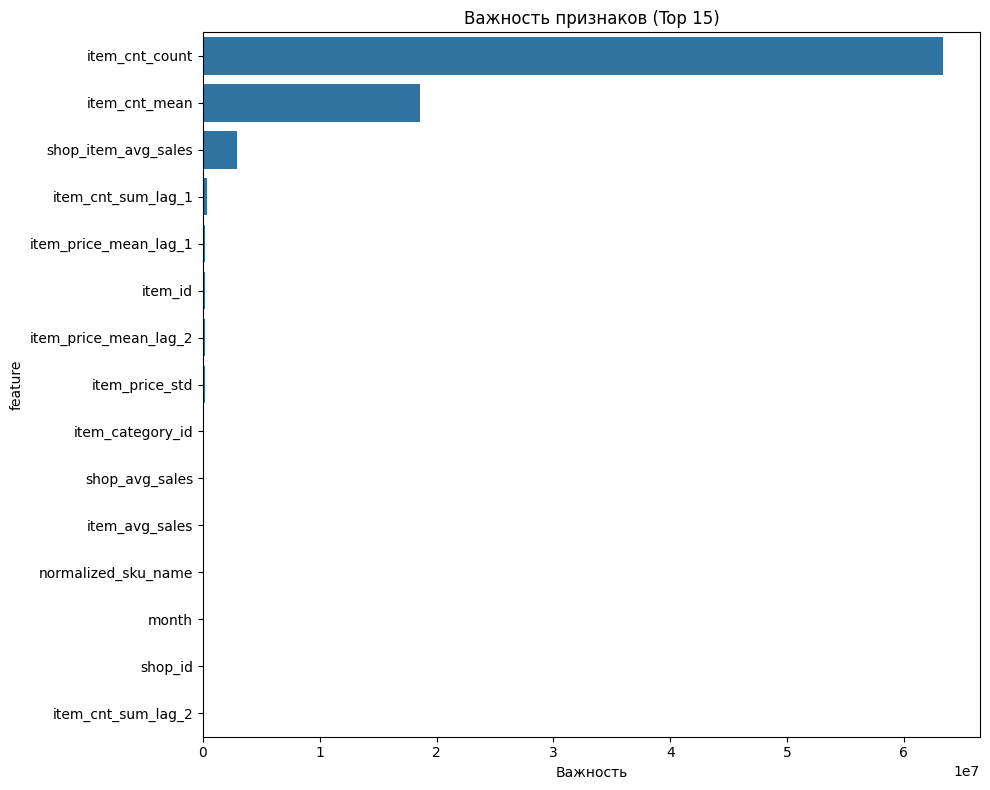

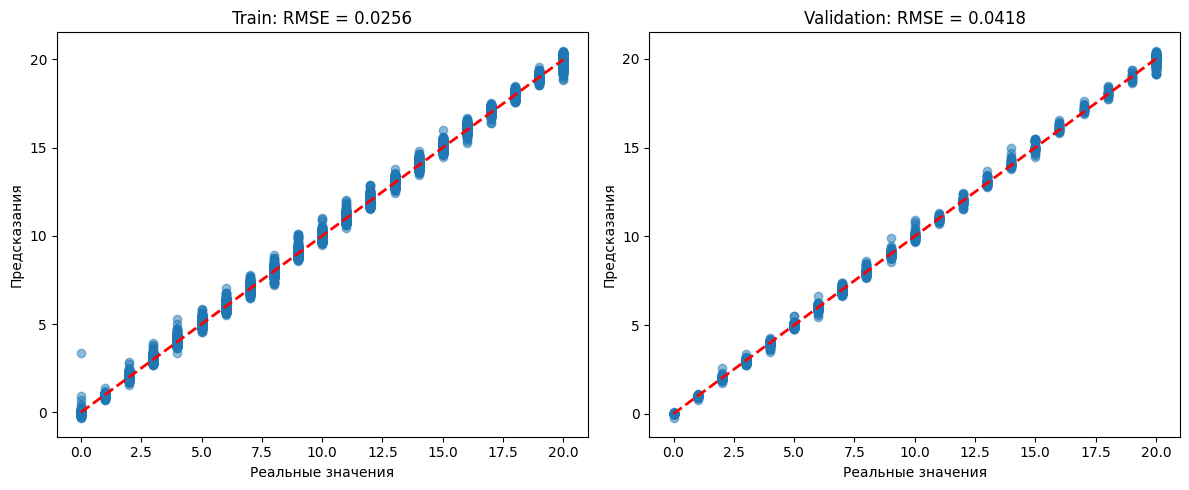


–¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º–∏ –æ—à–∏–±–∫–∞–º–∏:
                  mean_error  std_error  count  avg_sales
item_category_id                                         
78                     0.260        NaN      1      0.000
22                     0.063      0.143     63      2.540
83                     0.040      0.067     10     13.900
28                    -0.017      0.011      5     20.000
19                    -0.015      0.019      2      4.500
69                     0.013      0.084     40     19.200
82                     0.011      0.096    102      3.412
29                     0.010      0.062    140      4.736
77                    -0.010      0.070     39     11.897
17                     0.007      0.069    623      1.912


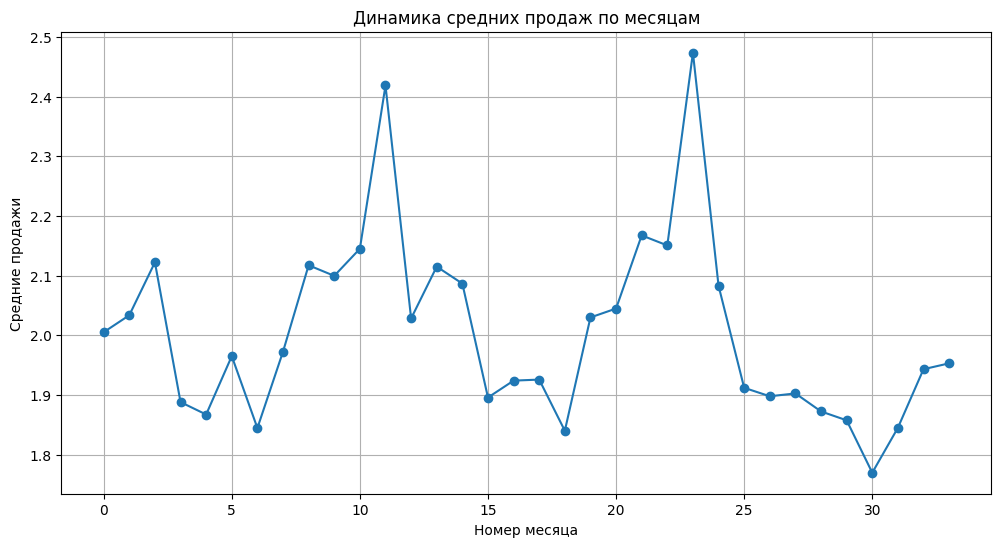


–ú–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ –≥–æ—Ç–æ–≤–∞ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é!
–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é predict_sales() –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ /content/drive/MyDrive/lgb_sales_model.txt

–ü–†–ò–ú–ï–†–´ –ò–°–ü–û–õ–¨–ó–û–í–ê–ù–ò–Ø predict_sales

1. –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï –î–õ–Ø –¢–ï–°–¢–û–í–û–ô –í–´–ë–û–†–ö–ò KAGGLE
--------------------------------------------------
‚úÖ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –ø–æ–ª—É—á–µ–Ω—ã!
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π: 214200
–°—Ä–µ–¥–Ω–µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 0.176
–ú–∏–Ω–∏–º—É–º: 0.028, –ú–∞–∫—Å–∏–º—É–º: 0.298
üìÅ Submission —Ñ–∞–π–ª —Å–æ—Ö—Ä–∞–Ω–µ–Ω: /content/drive/MyDrive/submission.csv

2. –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï –î–õ–Ø –ö–û–ù–ö–†–ï–¢–ù–´–• –¢–û–í–ê–†–û–í
--------------------------------------------------
‚úÖ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞:
  Shop 2, Item 30: 0.191
  Shop 5, Ite

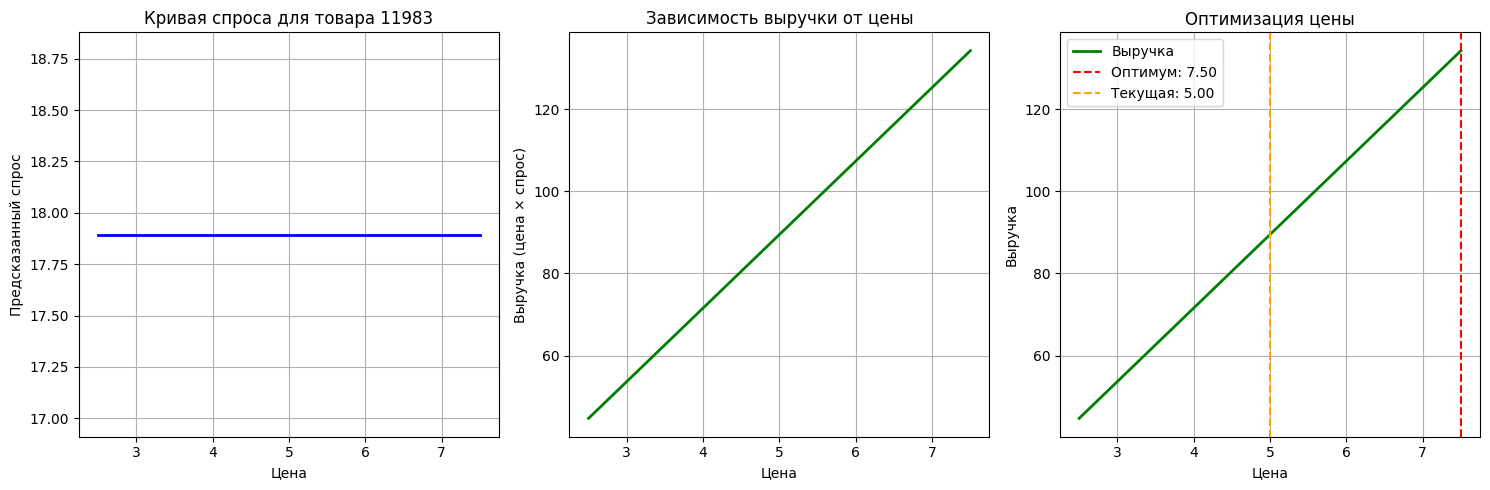

üìä –ê–Ω–∞–ª–∏–∑ —Ü–µ–Ω–æ–≤–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏:
  –¢–µ–∫—É—â–∞—è —Ü–µ–Ω–∞: 5.00
  –û–ø—Ç–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞: 7.50
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≤—ã—Ä—É—á–∫–∞: 134.21
  –ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏—Ä–æ—Å—Ç: 50.0%

4. –ü–ê–ö–ï–¢–ù–û–ï –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï
--------------------------------------------------
‚úÖ –¢–æ–ø-10 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (–º–∞–≥–∞–∑–∏–Ω, —Ç–æ–≤–∞—Ä, –ø—Ä–æ–≥–Ω–æ–∑):
  –ú–∞–≥–∞–∑–∏–Ω 2, –¢–æ–≤–∞—Ä 30: 0.188
  –ú–∞–≥–∞–∑–∏–Ω 2, –¢–æ–≤–∞—Ä 31: 0.188
  –ú–∞–≥–∞–∑–∏–Ω 2, –¢–æ–≤–∞—Ä 32: 0.188
  –ú–∞–≥–∞–∑–∏–Ω 2, –¢–æ–≤–∞—Ä 33: 0.188
  –ú–∞–≥–∞–∑–∏–Ω 2, –¢–æ–≤–∞—Ä 34: 0.188
  –ú–∞–≥–∞–∑–∏–Ω 5, –¢–æ–≤–∞—Ä 30: 0.188
  –ú–∞–≥–∞–∑–∏–Ω 5, –¢–æ–≤–∞—Ä 31: 0.188
  –ú–∞–≥–∞–∑–∏–Ω 5, –¢–æ–≤–∞—Ä 32: 0.188
  –ú–∞–≥–∞–∑–∏–Ω 5, –¢–æ–≤–∞—Ä 33: 0.188
  –ú–∞–≥–∞–∑–∏–Ω 5, –¢–æ–≤–∞—Ä 34: 0.188

–ì–û–¢–û–í–û! –§—É–Ω–∫—Ü–∏—è predict_sales –≥–æ—Ç–æ–≤–∞ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
from google.colab import drive
drive.mount('/content/drive/')

sales = pd.read_csv('/content/drive/MyDrive/dataset/sales_train.csv')
items = pd.read_csv('/content/drive/MyDrive/dataset/items.csv')
item_cats = pd.read_csv('/content/drive/MyDrive/dataset/item_categories.csv')
shops = pd.read_csv('/content/drive/MyDrive/dataset/shops.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

print("–†–∞–∑–º–µ—Ä—ã –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:")
print(f"Sales: {sales.shape}")
print(f"Items: {items.shape}")
print(f"Categories: {item_cats.shape}")
print(f"Shops: {shops.shape}")
print(f"Test: {test.shape}")

# –ê–≥—Ä–µ–≥–∞—Ü–∏—è: —Å—É–º–º–∏—Ä—É–µ–º –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –º–µ—Å—è—Ü–∞–º
monthly_sales = sales.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg({
    'item_cnt_day': ['sum', 'mean', 'count'],
    'item_price': ['mean', 'max', 'min', 'std']
})

monthly_sales.columns = ['date_block_num', 'shop_id', 'item_id',
                         'item_cnt_sum', 'item_cnt_mean', 'item_cnt_count',
                         'item_price_mean', 'item_price_max', 'item_price_min', 'item_price_std']

# –ó–∞–ø–æ–ª–Ω—è–µ–º NaN –≤ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–∏ —Ü–µ–Ω—ã
monthly_sales['item_price_std'] = monthly_sales['item_price_std'].fillna(0)

# –û–≥—Ä–∞–Ω–∏—á–∏–º –ø—Ä–æ–¥–∞–∂–∏ –¥–æ [0, 20], –∫–∞–∫ —Ç—Ä–µ–±—É–µ—Ç Kaggle
monthly_sales['item_cnt_sum'] = monthly_sales['item_cnt_sum'].clip(0, 20)

# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏
monthly_sales = monthly_sales.merge(items, on='item_id', how='left')
monthly_sales = monthly_sales.merge(item_cats, on='item_category_id', how='left')
monthly_sales = monthly_sales.merge(shops, on='shop_id', how='left')

print(f"–†–∞–∑–º–µ—Ä –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: {monthly_sales.shape}")

# –°–æ–∑–¥–∞–µ–º –ª–∞–≥–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–≤–∞–∂–Ω–æ –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤)
def create_lag_features(df, lag_cols, lags):
    """–°–æ–∑–¥–∞–µ—Ç –ª–∞–≥–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏"""
    df_lag = df.copy()

    for col in lag_cols:
        for lag in lags:
            df_lag[f'{col}_lag_{lag}'] = df_lag.groupby(['shop_id', 'item_id'])[col].shift(lag)

    return df_lag

# –°–æ–∑–¥–∞–µ–º –ª–∞–≥–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 3 –º–µ—Å—è—Ü–µ–≤
lag_features = ['item_cnt_sum', 'item_price_mean']
lags = [1, 2, 3]

monthly_sales = create_lag_features(monthly_sales, lag_features, lags)

# –°–æ–∑–¥–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ
def create_rolling_features(df, cols, windows):
    """–°–æ–∑–¥–∞–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ"""
    df_roll = df.copy()

    for col in cols:
        for window in windows:
            df_roll[f'{col}_rolling_mean_{window}'] = df_roll.groupby(['shop_id', 'item_id'])[col].rolling(window=window).mean().values
            df_roll[f'{col}_rolling_std_{window}'] = df_roll.groupby(['shop_id', 'item_id'])[col].rolling(window=window).std().values

    return df_roll

# –°–æ–∑–¥–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ
rolling_cols = ['item_cnt_sum', 'item_price_mean']
windows = [2, 3, 6]

monthly_sales = create_rolling_features(monthly_sales, rolling_cols, windows)

# –ò–Ω–∂–µ–Ω–µ—Ä–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
monthly_sales['item_avg_sales'] = monthly_sales.groupby('item_id')['item_cnt_sum'].transform('mean')
monthly_sales['item_avg_price'] = monthly_sales.groupby('item_id')['item_price_mean'].transform('mean')
monthly_sales['shop_avg_sales'] = monthly_sales.groupby('shop_id')['item_cnt_sum'].transform('mean')
monthly_sales['category_avg_sales'] = monthly_sales.groupby('item_category_id')['item_cnt_sum'].transform('mean')

# –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è
monthly_sales['shop_item_avg_sales'] = monthly_sales.groupby(['shop_id', 'item_id'])['item_cnt_sum'].transform('mean')
monthly_sales['shop_category_avg_sales'] = monthly_sales.groupby(['shop_id', 'item_category_id'])['item_cnt_sum'].transform('mean')

# –í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
monthly_sales['month'] = monthly_sales['date_block_num'] % 12
monthly_sales['year'] = monthly_sales['date_block_num'] // 12
monthly_sales['quarter'] = monthly_sales['month'] // 3

# –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤
def normalize_name(name):
    import re
    if pd.isna(name):
        return "unknown"
    name = str(name).lower()
    name = re.sub(r"[^a-z–∞-—è0-9]+", " ", name)
    name = re.sub(r"\s+", " ", name).strip()
    return name

monthly_sales['normalized_sku_name'] = monthly_sales['item_name'].apply(normalize_name)
monthly_sales['normalized_shop_name'] = monthly_sales['shop_name'].apply(normalize_name)

# –°–æ–∑–¥–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–µ—Ä–≤–æ–≥–æ —É—Ä–æ–≤–Ω—è
monthly_sales['sku_level_1_category'] = monthly_sales['item_category_name'].apply(
    lambda x: x.split(' ')[0] if pd.notna(x) else 'unknown'
)

# –°–æ–∑–¥–∞–µ–º —Ü–µ–Ω–æ–≤—ã–µ –∏ demand –∫–ª–∞—Å—Å—ã
monthly_sales['price_class'] = pd.qcut(monthly_sales['item_avg_price'], 5, labels=False, duplicates='drop')
monthly_sales['demand_class'] = pd.qcut(monthly_sales['item_avg_sales'], 5, labels=False, duplicates='drop')

# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
categorical_features = ['shop_id', 'item_id', 'item_category_id', 'normalized_sku_name',
                       'normalized_shop_name', 'sku_level_1_category']

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    monthly_sales[col] = le.fit_transform(monthly_sales[col].astype(str))
    label_encoders[col] = le

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
monthly_sales = monthly_sales.fillna(0)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏
feature_columns = (
    categorical_features +
    ['item_cnt_mean', 'item_cnt_count', 'item_price_mean', 'item_price_max',
     'item_price_min', 'item_price_std', 'item_avg_sales', 'item_avg_price',
     'shop_avg_sales', 'category_avg_sales', 'shop_item_avg_sales',
     'shop_category_avg_sales', 'month', 'year', 'quarter', 'price_class', 'demand_class'] +
    [col for col in monthly_sales.columns if 'lag_' in col or 'rolling_' in col]
)

# –£–±–∏—Ä–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å NaN –ø–æ—Å–ª–µ —Å–æ–∑–¥–∞–Ω–∏—è –ª–∞–≥–æ–≤ (–ø–µ—Ä–≤—ã–µ –º–µ—Å—è—Ü—ã)
monthly_sales_clean = monthly_sales.dropna()

print(f"–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: {monthly_sales_clean.shape}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {len(feature_columns)}")

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
X = monthly_sales_clean[feature_columns]
y = monthly_sales_clean['item_cnt_sum']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/validation –ø–æ –≤—Ä–µ–º–µ–Ω–∏ (–∫–∞–∫ –≤ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–∏)
# –ü–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü - validation, –æ—Å—Ç–∞–ª—å–Ω—ã–µ - train
max_date_block = monthly_sales_clean['date_block_num'].max()
train_mask = monthly_sales_clean['date_block_num'] < max_date_block
val_mask = monthly_sales_clean['date_block_num'] == max_date_block

X_train = X[train_mask]
y_train = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

# –û–±—É—á–µ–Ω–∏–µ LightGBM
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

# –°–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç—ã –¥–ª—è LightGBM
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
val_data = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_features, reference=train_data)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å —Å early stopping
model = lgb.train(
    lgb_params,
    train_data,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'eval'],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)]
)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

# –ú–µ—Ç—Ä–∏–∫–∏
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
train_mae = mean_absolute_error(y_train, y_pred_train)
val_mae = mean_absolute_error(y_val, y_pred_val)

print(f"\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–∏:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Validation MAE: {val_mae:.4f}")

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importance(importance_type='gain')
}).sort_values('importance', ascending=False)

print(f"\n–¢–æ–ø-15 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
print(feature_importance.head(15))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), y='feature', x='importance')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (Top 15)')
plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å')
plt.tight_layout()
plt.show()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π vs —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.title(f'Train: RMSE = {train_rmse:.4f}')

plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.title(f'Validation: RMSE = {val_rmse:.4f}')

plt.tight_layout()
plt.show()

# –ê–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º —Ç–æ–≤–∞—Ä–æ–≤
val_results = monthly_sales_clean[val_mask].copy()
val_results['predictions'] = y_pred_val
val_results['residuals'] = val_results['item_cnt_sum'] - val_results['predictions']

# –û—à–∏–±–∫–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
category_errors = val_results.groupby('item_category_id').agg({
    'residuals': ['mean', 'std', 'count'],
    'item_cnt_sum': 'mean'
}).round(3)

category_errors.columns = ['mean_error', 'std_error', 'count', 'avg_sales']
category_errors = category_errors.sort_values('mean_error', key=abs, ascending=False)

print(f"\n–¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º–∏ –æ—à–∏–±–∫–∞–º–∏:")
print(category_errors.head(10))

# –ê–Ω–∞–ª–∏–∑ –ø—Ä–æ–¥–∞–∂ –≤–æ –≤—Ä–µ–º–µ–Ω–∏
plt.figure(figsize=(12, 6))
monthly_avg = monthly_sales_clean.groupby('date_block_num')['item_cnt_sum'].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.xlabel('–ù–æ–º–µ—Ä –º–µ—Å—è—Ü–∞')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏')
plt.title('–î–∏–Ω–∞–º–∏–∫–∞ —Å—Ä–µ–¥–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂ –ø–æ –º–µ—Å—è—Ü–∞–º')
plt.grid(True)
plt.show()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
def predict_sales(model, data, feature_columns, label_encoders):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø—Ä–æ–¥–∞–∂ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    """
    # –ü–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
    data_processed = data.copy()

    # –ü—Ä–∏–º–µ–Ω—è–µ–º —Ç–µ –∂–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
    for col, le in label_encoders.items():
        if col in data_processed.columns:
            # –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –Ω–æ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
            mask = data_processed[col].isin(le.classes_)
            data_processed.loc[~mask, col] = 'unknown'

            # –î–æ–±–∞–≤–ª—è–µ–º 'unknown' –≤ –∫–ª–∞—Å—Å—ã –µ—Å–ª–∏ –µ–≥–æ –Ω–µ—Ç
            if 'unknown' not in le.classes_:
                le.classes_ = np.append(le.classes_, 'unknown')

            data_processed[col] = le.transform(data_processed[col].astype(str))

    # –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
    data_processed = data_processed.fillna(0)

    # –í—ã–±–∏—Ä–∞–µ–º –Ω—É–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    X_new = data_processed[feature_columns]

    # –ü—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º
    predictions = model.predict(X_new, num_iteration=model.best_iteration)

    return predictions

print(f"\n–ú–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ –≥–æ—Ç–æ–≤–∞ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é!")
print(f"–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é predict_sales() –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.")

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ)
model.save_model('/content/drive/MyDrive/lgb_sales_model.txt')
print(f"–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ /content/drive/MyDrive/lgb_sales_model.txt")

# =============================================================================
# –ü–†–ò–ú–ï–†–´ –ò–°–ü–û–õ–¨–ó–û–í–ê–ù–ò–Ø –§–£–ù–ö–¶–ò–ò predict_sales
# =============================================================================

print("\n" + "="*60)
print("–ü–†–ò–ú–ï–†–´ –ò–°–ü–û–õ–¨–ó–û–í–ê–ù–ò–Ø predict_sales")
print("="*60)

# –ü—Ä–∏–º–µ—Ä 1: –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ Kaggle
print("\n1. –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï –î–õ–Ø –¢–ï–°–¢–û–í–û–ô –í–´–ë–û–†–ö–ò KAGGLE")
print("-" * 50)

# –ó–∞–≥—Ä—É–∂–∞–µ–º —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ
test_data = test.copy()

# –î–æ–±–∞–≤–ª—è–µ–º date_block_num –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ (—Å–ª–µ–¥—É—é—â–∏–π –º–µ—Å—è—Ü –ø–æ—Å–ª–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –≤ train)
test_data['date_block_num'] = max_date_block + 1

# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏
test_data = test_data.merge(items, on='item_id', how='left')
test_data = test_data.merge(item_cats, on='item_category_id', how='left')
test_data = test_data.merge(shops, on='shop_id', how='left')

# –î–æ–±–∞–≤–ª—è–µ–º –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
# –î–ª—è –∫–∞–∂–¥–æ–π –ø–∞—Ä—ã shop_id, item_id –±–µ—Ä–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∏–∑ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
historical_stats = monthly_sales_clean.groupby(['shop_id', 'item_id']).agg({
    'item_cnt_sum': ['mean', 'std', 'count'],
    'item_price_mean': ['mean', 'std']
}).round(4)

historical_stats.columns = ['item_avg_sales_hist', 'item_sales_std_hist', 'item_sales_count_hist',
                           'item_price_mean_hist', 'item_price_std_hist']
historical_stats = historical_stats.reset_index()

test_data = test_data.merge(historical_stats, on=['shop_id', 'item_id'], how='left')

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –¥–ª—è –Ω–æ–≤—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤
test_data = test_data.fillna(0)

# –°–æ–∑–¥–∞–µ–º –±–∞–∑–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (—É–ø—Ä–æ—â–µ–Ω–Ω–∞—è –≤–µ—Ä—Å–∏—è –±–µ–∑ –ª–∞–≥–æ–≤ –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞)
test_data['item_avg_sales'] = test_data['item_avg_sales_hist']
test_data['item_avg_price'] = test_data['item_price_mean_hist']
test_data['shop_avg_sales'] = test_data.groupby('shop_id')['item_avg_sales_hist'].transform('mean')
test_data['category_avg_sales'] = test_data.groupby('item_category_id')['item_avg_sales_hist'].transform('mean')
test_data['shop_item_avg_sales'] = test_data['item_avg_sales_hist']
test_data['shop_category_avg_sales'] = test_data.groupby(['shop_id', 'item_category_id'])['item_avg_sales_hist'].transform('mean')

# –í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
test_data['month'] = test_data['date_block_num'] % 12
test_data['year'] = test_data['date_block_num'] // 12
test_data['quarter'] = test_data['month'] // 3

# –¢–µ–∫—Å—Ç–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
test_data['normalized_sku_name'] = test_data['item_name'].apply(normalize_name)
test_data['normalized_shop_name'] = test_data['shop_name'].apply(normalize_name)
test_data['sku_level_1_category'] = test_data['item_category_name'].apply(
    lambda x: x.split(' ')[0] if pd.notna(x) else 'unknown'
)

# –¶–µ–Ω–æ–≤—ã–µ –∫–ª–∞—Å—Å—ã (–∏—Å–ø–æ–ª—å–∑—É–µ–º –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ)
test_data['price_class'] = pd.qcut(test_data['item_avg_price'], 5, labels=False, duplicates='drop')
test_data['demand_class'] = pd.qcut(test_data['item_avg_sales'], 5, labels=False, duplicates='drop')

# –î–æ–±–∞–≤–ª—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–∑–∞–ø–æ–ª–Ω—è–µ–º –Ω—É–ª—è–º–∏ –¥–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è)
for col in feature_columns:
    if col not in test_data.columns:
        test_data[col] = 0

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
try:
    test_predictions = predict_sales(model, test_data, feature_columns, label_encoders)
    print(f"‚úÖ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –ø–æ–ª—É—á–µ–Ω—ã!")
    print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π: {len(test_predictions)}")
    print(f"–°—Ä–µ–¥–Ω–µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {np.mean(test_predictions):.3f}")
    print(f"–ú–∏–Ω–∏–º—É–º: {np.min(test_predictions):.3f}, –ú–∞–∫—Å–∏–º—É–º: {np.max(test_predictions):.3f}")

    # –°–æ–∑–¥–∞–µ–º submission —Ñ–∞–π–ª
    submission = pd.DataFrame({
        'ID': test['ID'],
        'item_cnt_month': np.clip(test_predictions, 0, 20)  # –ö–ª–∏–ø–∞–µ–º —Å–æ–≥–ª–∞—Å–Ω–æ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–º Kaggle
    })
    submission.to_csv('/content/drive/MyDrive/submission.csv', index=False)
    print(f"üìÅ Submission —Ñ–∞–π–ª —Å–æ—Ö—Ä–∞–Ω–µ–Ω: /content/drive/MyDrive/submission.csv")

except Exception as e:
    print(f"‚ùå –û—à–∏–±–∫–∞ –ø—Ä–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏: {e}")

# –ü—Ä–∏–º–µ—Ä 2: –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ –∏ –º–∞–≥–∞–∑–∏–Ω–æ–≤
print("\n2. –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï –î–õ–Ø –ö–û–ù–ö–†–ï–¢–ù–´–• –¢–û–í–ê–†–û–í")
print("-" * 50)

# –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
example_data = pd.DataFrame({
    'shop_id': [2, 5, 10],
    'item_id': [30, 31, 32],
    'date_block_num': [max_date_block + 1] * 3
})

# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏
example_data = example_data.merge(items, on='item_id', how='left')
example_data = example_data.merge(item_cats, on='item_category_id', how='left')
example_data = example_data.merge(shops, on='shop_id', how='left')

# –î–æ–±–∞–≤–ª—è–µ–º –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
example_data = example_data.merge(historical_stats, on=['shop_id', 'item_id'], how='left')
example_data = example_data.fillna(0)

# –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ (—É–ø—Ä–æ—â–µ–Ω–Ω–∞—è –≤–µ—Ä—Å–∏—è)
example_data['item_avg_sales'] = example_data['item_avg_sales_hist']
example_data['item_avg_price'] = example_data['item_price_mean_hist']
example_data['shop_avg_sales'] = 5.0  # –ü—Ä–∏–º–µ—Ä–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
example_data['category_avg_sales'] = 3.0  # –ü—Ä–∏–º–µ—Ä–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
example_data['shop_item_avg_sales'] = example_data['item_avg_sales_hist']
example_data['shop_category_avg_sales'] = 4.0  # –ü—Ä–∏–º–µ—Ä–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ

# –í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
example_data['month'] = example_data['date_block_num'] % 12
example_data['year'] = example_data['date_block_num'] // 12
example_data['quarter'] = example_data['month'] // 3

# –¢–µ–∫—Å—Ç–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
example_data['normalized_sku_name'] = example_data['item_name'].apply(normalize_name)
example_data['normalized_shop_name'] = example_data['shop_name'].apply(normalize_name)
example_data['sku_level_1_category'] = example_data['item_category_name'].apply(
    lambda x: x.split(' ')[0] if pd.notna(x) else 'unknown'
)

example_data['price_class'] = 2  # –°—Ä–µ–¥–Ω–∏–π —Ü–µ–Ω–æ–≤–æ–π –∫–ª–∞—Å—Å
example_data['demand_class'] = 2  # –°—Ä–µ–¥–Ω–∏–π –∫–ª–∞—Å—Å —Å–ø—Ä–æ—Å–∞

# –ó–∞–ø–æ–ª–Ω—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
for col in feature_columns:
    if col not in example_data.columns:
        example_data[col] = 0

try:
    example_predictions = predict_sales(model, example_data, feature_columns, label_encoders)
    print("‚úÖ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞:")
    for i, pred in enumerate(example_predictions):
        print(f"  Shop {example_data.iloc[i]['shop_id']}, Item {example_data.iloc[i]['item_id']}: {pred:.3f}")
except Exception as e:
    print(f"‚ùå –û—à–∏–±–∫–∞: {e}")

# –ü—Ä–∏–º–µ—Ä 3: –ê–Ω–∞–ª–∏–∑ –≤–ª–∏—è–Ω–∏—è —Ü–µ–Ω—ã –Ω–∞ —Å–ø—Ä–æ—Å (–∫–∞–∫ –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –∫–æ–¥–µ)
print("\n3. –ê–ù–ê–õ–ò–ó –í–õ–ò–Ø–ù–ò–Ø –¶–ï–ù–´ –ù–ê –°–ü–†–û–°")
print("-" * 50)

# –ë–µ—Ä–µ–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —Ç–æ–≤–∞—Ä –∏–∑ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
popular_items = val_results.groupby('item_id')['item_cnt_sum'].sum().sort_values(ascending=False).head(5)
top_item_id = popular_items.index[0]

# –ù–∞—Ö–æ–¥–∏–º —Ç–∏–ø–∏—á–Ω—É—é –∑–∞–ø–∏—Å—å –¥–ª—è —ç—Ç–æ–≥–æ —Ç–æ–≤–∞—Ä–∞
item_example = val_results[val_results['item_id'] == top_item_id].iloc[0:1].copy()

print(f"–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–æ–≤–∞—Ä ID: {top_item_id}")

# –°–æ–∑–¥–∞–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω —Ü–µ–Ω
base_price = item_example['item_price_mean'].values[0]
price_range = np.linspace(base_price * 0.5, base_price * 1.5, 20)

demand_predictions = []
price_analysis_data = []

for price in price_range:
    # –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é –¥–∞–Ω–Ω—ã—Ö —Å –Ω–æ–≤–æ–π —Ü–µ–Ω–æ–π
    price_test = item_example.copy()
    price_test['item_price_mean'] = price
    price_test['item_avg_price'] = price

    # –ó–∞–ø–æ–ª–Ω—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    for col in feature_columns:
        if col not in price_test.columns:
            price_test[col] = 0

    try:
        pred = predict_sales(model, price_test, feature_columns, label_encoders)[0]
        demand_predictions.append(pred)
        price_analysis_data.append({'price': price, 'demand': pred, 'revenue': price * pred})
    except:
        demand_predictions.append(0)
        price_analysis_data.append({'price': price, 'demand': 0, 'revenue': 0})

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å–ø—Ä–æ—Å–∞ –æ—Ç —Ü–µ–Ω—ã
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(price_range, demand_predictions, 'b-', linewidth=2)
plt.xlabel('–¶–µ–Ω–∞')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π —Å–ø—Ä–æ—Å')
plt.title(f'–ö—Ä–∏–≤–∞—è —Å–ø—Ä–æ—Å–∞ –¥–ª—è —Ç–æ–≤–∞—Ä–∞ {top_item_id}')
plt.grid(True)

# –ì—Ä–∞—Ñ–∏–∫ –≤—ã—Ä—É—á–∫–∏
revenue = [p['revenue'] for p in price_analysis_data]
plt.subplot(1, 3, 2)
plt.plot(price_range, revenue, 'g-', linewidth=2)
plt.xlabel('–¶–µ–Ω–∞')
plt.ylabel('–í—ã—Ä—É—á–∫–∞ (—Ü–µ–Ω–∞ √ó —Å–ø—Ä–æ—Å)')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤—ã—Ä—É—á–∫–∏ –æ—Ç —Ü–µ–Ω—ã')
plt.grid(True)

# –ù–∞–π–¥–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é —Ü–µ–Ω—É –¥–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –≤—ã—Ä—É—á–∫–∏
optimal_idx = np.argmax(revenue)
optimal_price = price_range[optimal_idx]
optimal_revenue = revenue[optimal_idx]

plt.subplot(1, 3, 3)
plt.plot(price_range, revenue, 'g-', linewidth=2, label='–í—ã—Ä—É—á–∫–∞')
plt.axvline(x=optimal_price, color='r', linestyle='--', label=f'–û–ø—Ç–∏–º—É–º: {optimal_price:.2f}')
plt.axvline(x=base_price, color='orange', linestyle='--', label=f'–¢–µ–∫—É—â–∞—è: {base_price:.2f}')
plt.xlabel('–¶–µ–Ω–∞')
plt.ylabel('–í—ã—Ä—É—á–∫–∞')
plt.title('–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —Ü–µ–Ω—ã')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"üìä –ê–Ω–∞–ª–∏–∑ —Ü–µ–Ω–æ–≤–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏:")
print(f"  –¢–µ–∫—É—â–∞—è —Ü–µ–Ω–∞: {base_price:.2f}")
print(f"  –û–ø—Ç–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞: {optimal_price:.2f}")
print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≤—ã—Ä—É—á–∫–∞: {optimal_revenue:.2f}")
print(f"  –ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏—Ä–æ—Å—Ç: {(optimal_revenue / (base_price * demand_predictions[10]) - 1) * 100:.1f}%")

# –ü—Ä–∏–º–µ—Ä 4: –ü–∞–∫–µ—Ç–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è –º–Ω–æ–∂–µ—Å—Ç–≤–∞ —Ç–æ–≤–∞—Ä–æ–≤
print("\n4. –ü–ê–ö–ï–¢–ù–û–ï –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï")
print("-" * 50)

# –°–æ–∑–¥–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç–æ–≤–∞—Ä–æ–≤ –∏ –º–∞–≥–∞–∑–∏–Ω–æ–≤
batch_data = []
for shop in [2, 5, 10]:
    for item in [30, 31, 32, 33, 34]:
        batch_data.append({
            'shop_id': shop,
            'item_id': item,
            'date_block_num': max_date_block + 1
        })

batch_df = pd.DataFrame(batch_data)

# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏ –∏ —Å–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ (—É–ø—Ä–æ—â–µ–Ω–Ω–æ)
batch_df = batch_df.merge(items, on='item_id', how='left')
batch_df = batch_df.merge(item_cats, on='item_category_id', how='left')
batch_df = batch_df.merge(shops, on='shop_id', how='left')
batch_df = batch_df.merge(historical_stats, on=['shop_id', 'item_id'], how='left')
batch_df = batch_df.fillna(0)

# –î–æ–±–∞–≤–ª—è–µ–º –±–∞–∑–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
batch_df['item_avg_sales'] = batch_df['item_avg_sales_hist']
batch_df['item_avg_price'] = batch_df['item_price_mean_hist']
batch_df['shop_avg_sales'] = batch_df.groupby('shop_id')['item_avg_sales_hist'].transform('mean')
batch_df['category_avg_sales'] = batch_df.groupby('item_category_id')['item_avg_sales_hist'].transform('mean')
batch_df['shop_item_avg_sales'] = batch_df['item_avg_sales_hist']
batch_df['shop_category_avg_sales'] = batch_df.groupby(['shop_id', 'item_category_id'])['item_avg_sales_hist'].transform('mean')

batch_df['month'] = batch_df['date_block_num'] % 12
batch_df['year'] = batch_df['date_block_num'] // 12
batch_df['quarter'] = batch_df['month'] // 3

batch_df['normalized_sku_name'] = batch_df['item_name'].apply(normalize_name)
batch_df['normalized_shop_name'] = batch_df['shop_name'].apply(normalize_name)
batch_df['sku_level_1_category'] = batch_df['item_category_name'].apply(
    lambda x: x.split(' ')[0] if pd.notna(x) else 'unknown'
)

batch_df['price_class'] = pd.qcut(batch_df['item_avg_price'], 3, labels=False, duplicates='drop')
batch_df['demand_class'] = pd.qcut(batch_df['item_avg_sales'], 3, labels=False, duplicates='drop')

# –ó–∞–ø–æ–ª–Ω—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
for col in feature_columns:
    if col not in batch_df.columns:
        batch_df[col] = 0

try:
    batch_predictions = predict_sales(model, batch_df, feature_columns, label_encoders)

    # –°–æ–∑–¥–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∏—Ä—É—é—â—É—é —Ç–∞–±–ª–∏—Ü—É
    results_df = batch_df[['shop_id', 'item_id']].copy()
    results_df['predicted_sales'] = batch_predictions
    results_df = results_df.sort_values('predicted_sales', ascending=False)

    print("‚úÖ –¢–æ–ø-10 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (–º–∞–≥–∞–∑–∏–Ω, —Ç–æ–≤–∞—Ä, –ø—Ä–æ–≥–Ω–æ–∑):")
    for _, row in results_df.head(10).iterrows():
        print(f"  –ú–∞–≥–∞–∑–∏–Ω {int(row['shop_id'])}, –¢–æ–≤–∞—Ä {int(row['item_id'])}: {row['predicted_sales']:.3f}")

except Exception as e:
    print(f"‚ùå –û—à–∏–±–∫–∞ –≤ –ø–∞–∫–µ—Ç–Ω–æ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏: {e}")

print("\n" + "="*60)
print("–ì–û–¢–û–í–û! –§—É–Ω–∫—Ü–∏—è predict_sales –≥–æ—Ç–æ–≤–∞ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é")
print("="*60)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
–†–∞–∑–º–µ—Ä—ã –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:
Sales: (2935849, 6)
Items: (22170, 3)
Categories: (84, 2)
Shops: (60, 2)
Test: (214200, 3)
–†–∞–∑–º–µ—Ä –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: (1609124, 14)
–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: (1609124, 54)
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 49
Train shape: (1577593, 49)
Validation shape: (31531, 49)
Training until validation scores don't improve for 50 rounds
[100]	train's rmse: 0.0824373	eval's rmse: 0.0952653
[200]	train's rmse: 0.0469351	eval's rmse: 0.0659727
[300]	train's rmse: 0.0403755	eval's rmse: 0.0602954
[400]	train's rmse: 0.0376304	eval's rmse: 0.0584753
[500]	train's rmse: 0.0362333	eval's rmse: 0.057816
[600]	train's rmse: 0.0349039	eval's rmse: 0.0569626
[700]	train's rmse: 0.0337434	eval's rmse: 0.0561797
[800]	train's rmse: 0.0328941	eval's rmse: 0.0559162
Early stopping, best iteration i

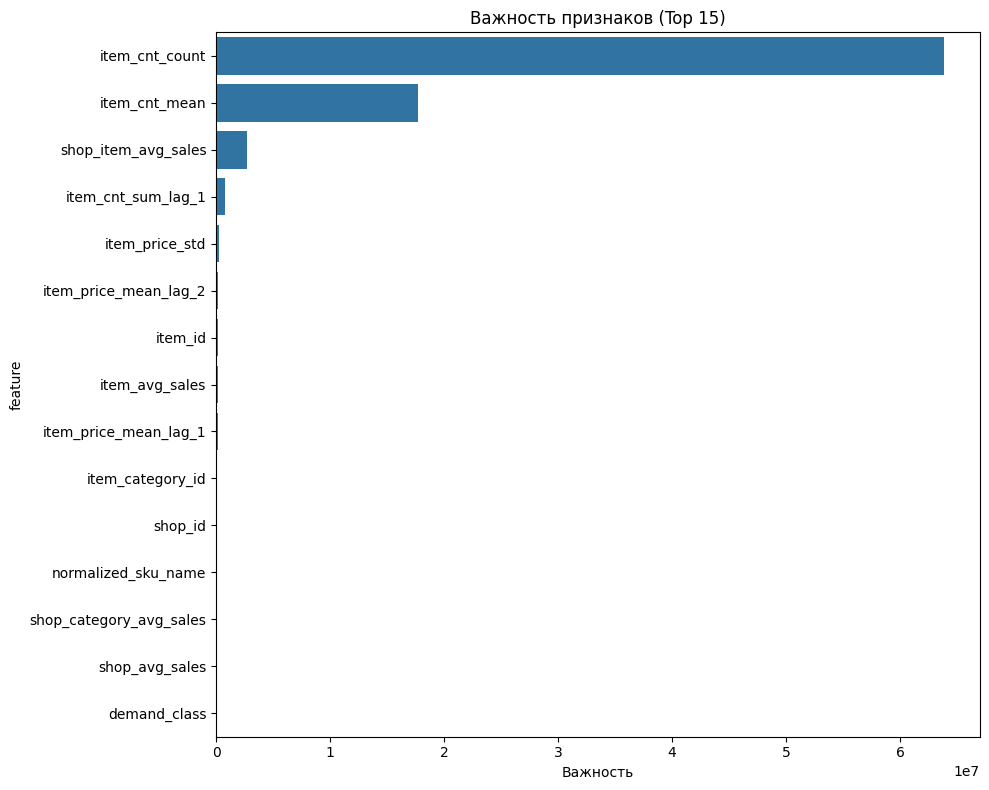

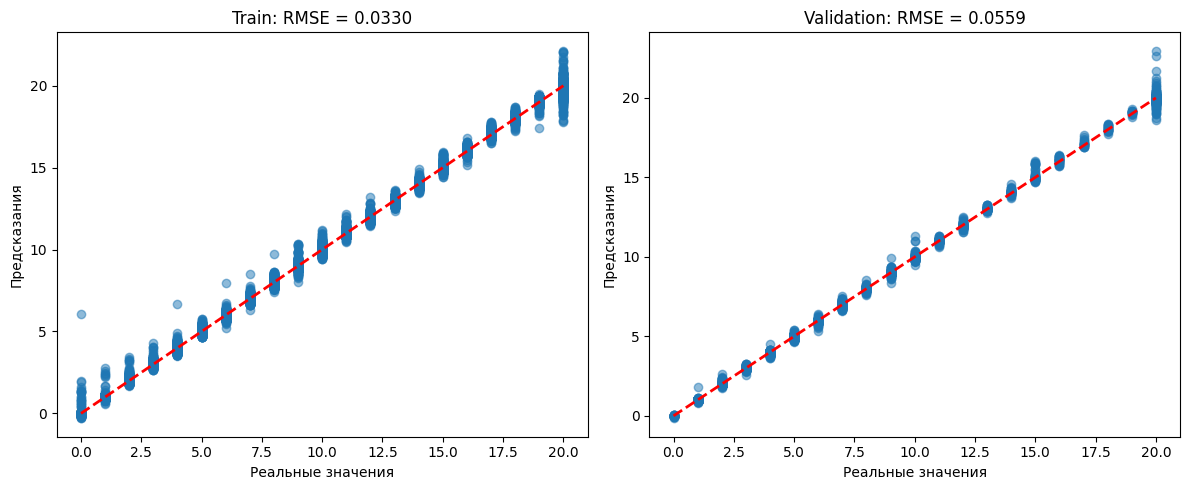


–¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º–∏ –æ—à–∏–±–∫–∞–º–∏:
                  mean_error  std_error  count  avg_sales
item_category_id                                         
78                     0.158        NaN      1      0.000
83                     0.060      0.136     10     13.900
69                     0.040      0.171     40     19.200
77                    -0.028      0.076     39     11.897
28                    -0.028      0.034      5     20.000
19                    -0.022      0.063      2      4.500
22                     0.016      0.154     63      2.540
25                     0.012      0.110    277      3.412
17                     0.011      0.063    623      1.912
58                     0.010      0.109    761      2.611


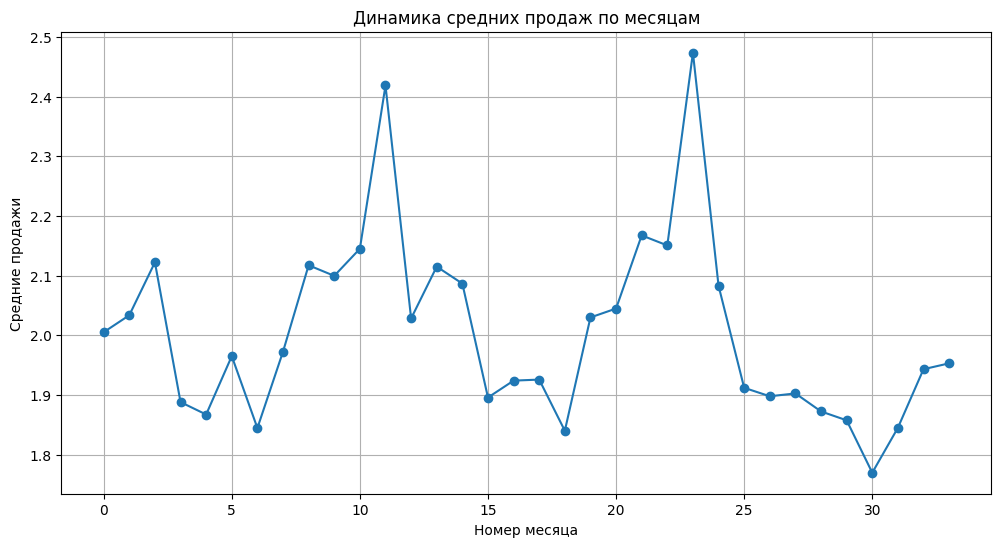


–ú–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ –≥–æ—Ç–æ–≤–∞ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é!
–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é predict_sales() –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ /content/drive/MyDrive/lgb_sales_model.txt

–ü–†–ò–ú–ï–†–´ –ò–°–ü–û–õ–¨–ó–û–í–ê–ù–ò–Ø predict_sales

1. –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï –î–õ–Ø –¢–ï–°–¢–û–í–û–ô –í–´–ë–û–†–ö–ò KAGGLE
--------------------------------------------------
‚úÖ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –ø–æ–ª—É—á–µ–Ω—ã!
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π: 214200
–°—Ä–µ–¥–Ω–µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 0.159
–ú–∏–Ω–∏–º—É–º: -0.015, –ú–∞–∫—Å–∏–º—É–º: 0.260
üìÅ Submission —Ñ–∞–π–ª —Å–æ—Ö—Ä–∞–Ω–µ–Ω: /content/drive/MyDrive/submission.csv

2. –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï –î–õ–Ø –ö–û–ù–ö–†–ï–¢–ù–´–• –¢–û–í–ê–†–û–í
--------------------------------------------------
‚úÖ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞:
  Shop 2, Item 30: 0.165
  Shop 5, It

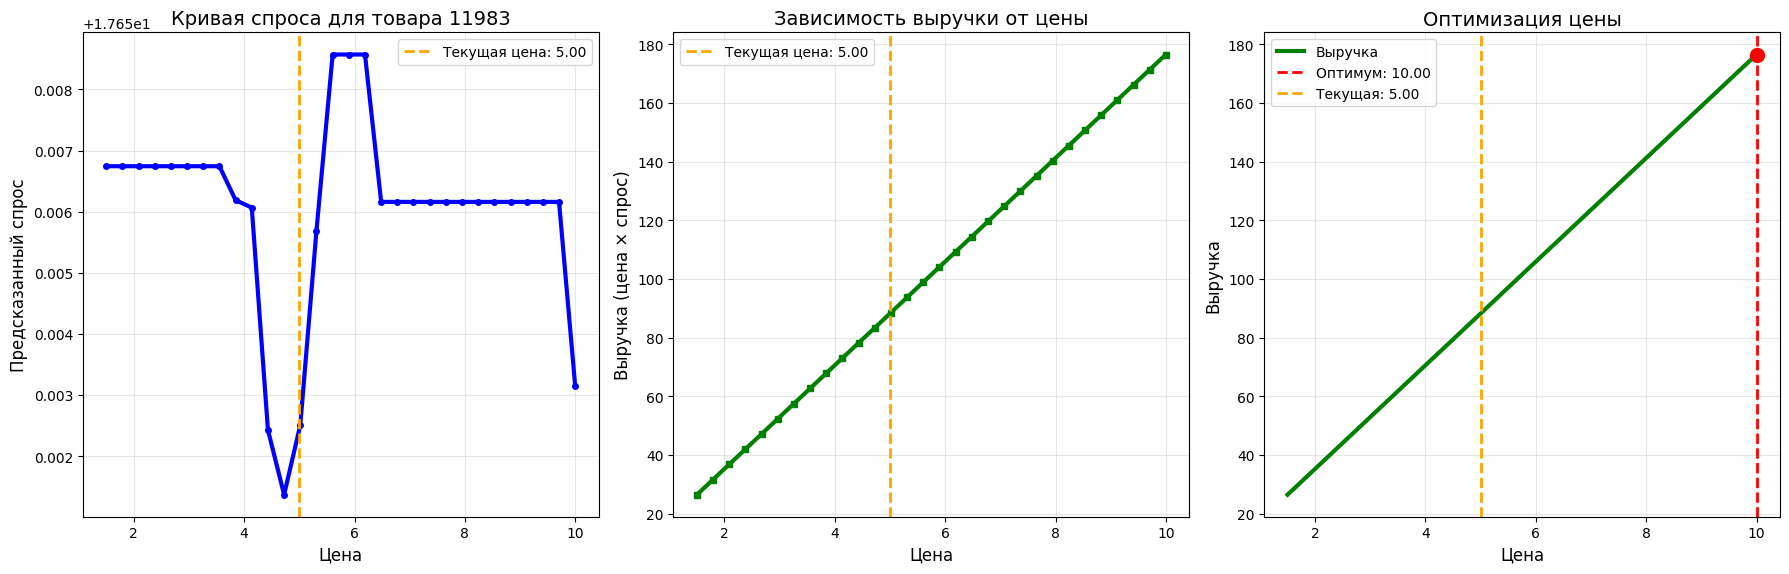

üìä –ü–æ–¥—Ä–æ–±–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Ü–µ–Ω–æ–≤–æ–π —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏:
  –¢–æ–≤–∞—Ä ID: 11983
  –¢–µ–∫—É—â–∞—è —Ü–µ–Ω–∞: 5.00
  –¢–µ–∫—É—â–∏–π —Å–ø—Ä–æ—Å: 17.653
  –¢–µ–∫—É—â–∞—è –≤—ã—Ä—É—á–∫–∞: 88.26
  
  –û–ø—Ç–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞: 10.00
  –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Å–ø—Ä–æ—Å: 17.653
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≤—ã—Ä—É—á–∫–∞: 176.53
  
  –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ü–µ–Ω—ã: +100.0%
  –ò–∑–º–µ–Ω–µ–Ω–∏–µ –≤—ã—Ä—É—á–∫–∏: +100.0%
  
  –°—Ä–µ–¥–Ω—è—è —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å —Å–ø—Ä–æ—Å–∞: -0.00
  –°–ø—Ä–æ—Å –ù–ï–≠–õ–ê–°–¢–ò–ß–ù–´–ô (|—ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å| < 1)

üìà –í–ª–∏—è–Ω–∏–µ —Ü–µ–Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –º–æ–¥–µ–ª—å:
  price_relative_to_shop: 7804.3
  item_price_mean: 1487.2
  price_percentile: 844.0
  price_relative_to_category: 163.7
  log_price: 1.1
  price_squared: 0.3

4. –ü–ê–ö–ï–¢–ù–û–ï –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï
--------------------------------------------------
‚úÖ –¢–æ–ø-10 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (–º–∞–≥–∞–∑–∏–Ω, —Ç–æ–≤–∞—Ä, –ø—Ä–æ–≥–Ω–æ–∑):
  –ú–∞–≥–∞–∑–∏–Ω

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
from google.colab import drive
drive.mount('/content/drive/')

sales = pd.read_csv('/content/drive/MyDrive/dataset/sales_train.csv')
items = pd.read_csv('/content/drive/MyDrive/dataset/items.csv')
item_cats = pd.read_csv('/content/drive/MyDrive/dataset/item_categories.csv')
shops = pd.read_csv('/content/drive/MyDrive/dataset/shops.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

print("–†–∞–∑–º–µ—Ä—ã –¥–∞—Ç–∞—Å–µ—Ç–æ–≤:")
print(f"Sales: {sales.shape}")
print(f"Items: {items.shape}")
print(f"Categories: {item_cats.shape}")
print(f"Shops: {shops.shape}")
print(f"Test: {test.shape}")

# –ê–≥—Ä–µ–≥–∞—Ü–∏—è: —Å—É–º–º–∏—Ä—É–µ–º –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –º–µ—Å—è—Ü–∞–º
monthly_sales = sales.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg({
    'item_cnt_day': ['sum', 'mean', 'count'],
    'item_price': ['mean', 'max', 'min', 'std']
})

monthly_sales.columns = ['date_block_num', 'shop_id', 'item_id',
                         'item_cnt_sum', 'item_cnt_mean', 'item_cnt_count',
                         'item_price_mean', 'item_price_max', 'item_price_min', 'item_price_std']

# –ó–∞–ø–æ–ª–Ω—è–µ–º NaN –≤ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–º –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–∏ —Ü–µ–Ω—ã
monthly_sales['item_price_std'] = monthly_sales['item_price_std'].fillna(0)

# –û–≥—Ä–∞–Ω–∏—á–∏–º –ø—Ä–æ–¥–∞–∂–∏ –¥–æ [0, 20], –∫–∞–∫ —Ç—Ä–µ–±—É–µ—Ç Kaggle
monthly_sales['item_cnt_sum'] = monthly_sales['item_cnt_sum'].clip(0, 20)

# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏
monthly_sales = monthly_sales.merge(items, on='item_id', how='left')
monthly_sales = monthly_sales.merge(item_cats, on='item_category_id', how='left')
monthly_sales = monthly_sales.merge(shops, on='shop_id', how='left')

print(f"–†–∞–∑–º–µ—Ä –æ–±—ä–µ–¥–∏–Ω–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: {monthly_sales.shape}")

# –°–æ–∑–¥–∞–µ–º –ª–∞–≥–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–≤–∞–∂–Ω–æ –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤)
def create_lag_features(df, lag_cols, lags):
    """–°–æ–∑–¥–∞–µ—Ç –ª–∞–≥–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏"""
    df_lag = df.copy()

    for col in lag_cols:
        for lag in lags:
            df_lag[f'{col}_lag_{lag}'] = df_lag.groupby(['shop_id', 'item_id'])[col].shift(lag)

    return df_lag

# –°–æ–∑–¥–∞–µ–º –ª–∞–≥–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –ø–æ—Å–ª–µ–¥–Ω–∏—Ö 3 –º–µ—Å—è—Ü–µ–≤
lag_features = ['item_cnt_sum', 'item_price_mean']
lags = [1, 2, 3]

monthly_sales = create_lag_features(monthly_sales, lag_features, lags)

# –°–æ–∑–¥–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ
def create_rolling_features(df, cols, windows):
    """–°–æ–∑–¥–∞–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ"""
    df_roll = df.copy()

    for col in cols:
        for window in windows:
            df_roll[f'{col}_rolling_mean_{window}'] = df_roll.groupby(['shop_id', 'item_id'])[col].rolling(window=window).mean().values
            df_roll[f'{col}_rolling_std_{window}'] = df_roll.groupby(['shop_id', 'item_id'])[col].rolling(window=window).std().values

    return df_roll

# –°–æ–∑–¥–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ
rolling_cols = ['item_cnt_sum', 'item_price_mean']
windows = [2, 3, 6]

monthly_sales = create_rolling_features(monthly_sales, rolling_cols, windows)

# –ò–Ω–∂–µ–Ω–µ—Ä–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
monthly_sales['item_avg_sales'] = monthly_sales.groupby('item_id')['item_cnt_sum'].transform('mean')
monthly_sales['item_avg_price'] = monthly_sales.groupby('item_id')['item_price_mean'].transform('mean')
monthly_sales['shop_avg_sales'] = monthly_sales.groupby('shop_id')['item_cnt_sum'].transform('mean')
monthly_sales['category_avg_sales'] = monthly_sales.groupby('item_category_id')['item_cnt_sum'].transform('mean')

# –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è
monthly_sales['shop_item_avg_sales'] = monthly_sales.groupby(['shop_id', 'item_id'])['item_cnt_sum'].transform('mean')
monthly_sales['shop_category_avg_sales'] = monthly_sales.groupby(['shop_id', 'item_category_id'])['item_cnt_sum'].transform('mean')

# –í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
monthly_sales['month'] = monthly_sales['date_block_num'] % 12
monthly_sales['year'] = monthly_sales['date_block_num'] // 12
monthly_sales['quarter'] = monthly_sales['month'] // 3

# –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤
def normalize_name(name):
    import re
    if pd.isna(name):
        return "unknown"
    name = str(name).lower()
    name = re.sub(r"[^a-z–∞-—è0-9]+", " ", name)
    name = re.sub(r"\s+", " ", name).strip()
    return name

monthly_sales['normalized_sku_name'] = monthly_sales['item_name'].apply(normalize_name)
monthly_sales['normalized_shop_name'] = monthly_sales['shop_name'].apply(normalize_name)

# –°–æ–∑–¥–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–µ—Ä–≤–æ–≥–æ —É—Ä–æ–≤–Ω—è
monthly_sales['sku_level_1_category'] = monthly_sales['item_category_name'].apply(
    lambda x: x.split(' ')[0] if pd.notna(x) else 'unknown'
)

# –°–æ–∑–¥–∞–µ–º —Ü–µ–Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏
monthly_sales['price_class'] = pd.qcut(monthly_sales['item_avg_price'], 5, labels=False, duplicates='drop')
monthly_sales['demand_class'] = pd.qcut(monthly_sales['item_avg_sales'], 5, labels=False, duplicates='drop')

# –í–ê–ñ–ù–û: –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —Ü–µ–Ω–æ–≤–æ–π —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏
# –û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è —Ü–µ–Ω–∞ –∫ —Å—Ä–µ–¥–Ω–µ–π –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
monthly_sales['price_relative_to_category'] = monthly_sales.groupby('item_category_id')['item_price_mean'].transform(
    lambda x: x / x.mean()
)

# –û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è —Ü–µ–Ω–∞ –∫ —Å—Ä–µ–¥–Ω–µ–π –ø–æ –º–∞–≥–∞–∑–∏–Ω—É
monthly_sales['price_relative_to_shop'] = monthly_sales.groupby('shop_id')['item_price_mean'].transform(
    lambda x: x / x.mean()
)

# –û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è —Ü–µ–Ω–∞ –∫ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–æ–π —Ü–µ–Ω–µ —Ç–æ–≤–∞—Ä–∞
monthly_sales['price_relative_to_item_history'] = monthly_sales['item_price_mean'] / monthly_sales['item_avg_price']

# –õ–æ–≥–∞—Ä–∏—Ñ–º —Ü–µ–Ω—ã (–¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Å—Ç–µ–ø–µ–Ω–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏)
monthly_sales['log_price'] = np.log1p(monthly_sales['item_price_mean'])

# –ö–≤–∞–¥—Ä–∞—Ç —Ü–µ–Ω—ã (–¥–ª—è –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç–∏)
monthly_sales['price_squared'] = monthly_sales['item_price_mean'] ** 2

# –ü—Ä–∏–∑–Ω–∞–∫ "–¥–æ—Ä–æ–≥–æ–≤–∏–∑–Ω—ã" —Ç–æ–≤–∞—Ä–∞
monthly_sales['price_percentile'] = monthly_sales.groupby('item_category_id')['item_price_mean'].rank(pct=True)

# –í–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —Ü–µ–Ω—ã —Å –¥—Ä—É–≥–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
monthly_sales['price_x_category'] = monthly_sales['item_price_mean'] * monthly_sales['item_category_id']
monthly_sales['price_x_month'] = monthly_sales['item_price_mean'] * monthly_sales['month']

# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
categorical_features = ['shop_id', 'item_id', 'item_category_id', 'normalized_sku_name',
                       'normalized_shop_name', 'sku_level_1_category']

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    monthly_sales[col] = le.fit_transform(monthly_sales[col].astype(str))
    label_encoders[col] = le

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
monthly_sales = monthly_sales.fillna(0)

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏
feature_columns = (
    categorical_features +
    ['item_cnt_mean', 'item_cnt_count', 'item_price_mean', 'item_price_max',
     'item_price_min', 'item_price_std', 'item_avg_sales', 'item_avg_price',
     'shop_avg_sales', 'category_avg_sales', 'shop_item_avg_sales',
     'shop_category_avg_sales', 'month', 'year', 'quarter', 'price_class', 'demand_class',
     # –î–æ–±–∞–≤–ª—è–µ–º —Ü–µ–Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏
     'price_relative_to_category', 'price_relative_to_shop', 'price_relative_to_item_history',
     'log_price', 'price_squared', 'price_percentile', 'price_x_category', 'price_x_month'] +
    [col for col in monthly_sales.columns if 'lag_' in col or 'rolling_' in col]
)

# –£–±–∏—Ä–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å NaN –ø–æ—Å–ª–µ —Å–æ–∑–¥–∞–Ω–∏—è –ª–∞–≥–æ–≤ (–ø–µ—Ä–≤—ã–µ –º–µ—Å—è—Ü—ã)
monthly_sales_clean = monthly_sales.dropna()

print(f"–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: {monthly_sales_clean.shape}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {len(feature_columns)}")

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
X = monthly_sales_clean[feature_columns]
y = monthly_sales_clean['item_cnt_sum']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/validation –ø–æ –≤—Ä–µ–º–µ–Ω–∏ (–∫–∞–∫ –≤ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–∏)
# –ü–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü - validation, –æ—Å—Ç–∞–ª—å–Ω—ã–µ - train
max_date_block = monthly_sales_clean['date_block_num'].max()
train_mask = monthly_sales_clean['date_block_num'] < max_date_block
val_mask = monthly_sales_clean['date_block_num'] == max_date_block

X_train = X[train_mask]
y_train = y[train_mask]
X_val = X[val_mask]
y_val = y[val_mask]

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")

# –û–±—É—á–µ–Ω–∏–µ LightGBM —Å —Ñ–æ–∫—É—Å–æ–º –Ω–∞ —Ü–µ–Ω–æ–≤—É—é —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 63,  # –£–≤–µ–ª–∏—á–∏–ª–∏ –¥–ª—è –ª—É—á—à–µ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π
    'learning_rate': 0.05,
    'feature_fraction': 0.8,  # –£–º–µ–Ω—å—à–∏–ª–∏ —á—Ç–æ–±—ã –º–æ–¥–µ–ª—å –±–æ–ª—å—à–µ —Ñ–æ–∫—É—Å–∏—Ä–æ–≤–∞–ª–∞—Å—å –Ω–∞ –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': 8,  # –î–æ–±–∞–≤–∏–ª–∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –≥–ª—É–±–∏–Ω—ã –¥–ª—è –ª—É—á—à–µ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–π
    'min_data_in_leaf': 100,  # –£–≤–µ–ª–∏—á–∏–ª–∏ –¥–ª—è —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏
    'lambda_l1': 0.1,  # –î–æ–±–∞–≤–∏–ª–∏ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é
    'lambda_l2': 0.1,
    'verbose': -1,
    'random_state': 42
}

# –°–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç—ã –¥–ª—è LightGBM
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
val_data = lgb.Dataset(X_val, label=y_val, categorical_feature=categorical_features, reference=train_data)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å —Å early stopping
model = lgb.train(
    lgb_params,
    train_data,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'eval'],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)]
)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

# –ú–µ—Ç—Ä–∏–∫–∏
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
train_mae = mean_absolute_error(y_train, y_pred_train)
val_mae = mean_absolute_error(y_val, y_pred_val)

print(f"\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–¥–µ–ª–∏:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Validation MAE: {val_mae:.4f}")

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importance(importance_type='gain')
}).sort_values('importance', ascending=False)

print(f"\n–¢–æ–ø-15 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
print(feature_importance.head(15))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), y='feature', x='importance')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (Top 15)')
plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å')
plt.tight_layout()
plt.show()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π vs —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.title(f'Train: RMSE = {train_rmse:.4f}')

plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('–†–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.title(f'Validation: RMSE = {val_rmse:.4f}')

plt.tight_layout()
plt.show()

# –ê–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º —Ç–æ–≤–∞—Ä–æ–≤
val_results = monthly_sales_clean[val_mask].copy()
val_results['predictions'] = y_pred_val
val_results['residuals'] = val_results['item_cnt_sum'] - val_results['predictions']

# –û—à–∏–±–∫–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
category_errors = val_results.groupby('item_category_id').agg({
    'residuals': ['mean', 'std', 'count'],
    'item_cnt_sum': 'mean'
}).round(3)

category_errors.columns = ['mean_error', 'std_error', 'count', 'avg_sales']
category_errors = category_errors.sort_values('mean_error', key=abs, ascending=False)

print(f"\n–¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º–∏ –æ—à–∏–±–∫–∞–º–∏:")
print(category_errors.head(10))

# –ê–Ω–∞–ª–∏–∑ –ø—Ä–æ–¥–∞–∂ –≤–æ –≤—Ä–µ–º–µ–Ω–∏
plt.figure(figsize=(12, 6))
monthly_avg = monthly_sales_clean.groupby('date_block_num')['item_cnt_sum'].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.xlabel('–ù–æ–º–µ—Ä –º–µ—Å—è—Ü–∞')
plt.ylabel('–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏')
plt.title('–î–∏–Ω–∞–º–∏–∫–∞ —Å—Ä–µ–¥–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂ –ø–æ –º–µ—Å—è—Ü–∞–º')
plt.grid(True)
plt.show()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
def predict_sales(model, data, feature_columns, label_encoders):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø—Ä–æ–¥–∞–∂ –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    """
    # –ü–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
    data_processed = data.copy()

    # –ü—Ä–∏–º–µ–Ω—è–µ–º —Ç–µ –∂–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
    for col, le in label_encoders.items():
        if col in data_processed.columns:
            # –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –Ω–æ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
            mask = data_processed[col].isin(le.classes_)
            data_processed.loc[~mask, col] = 'unknown'

            # –î–æ–±–∞–≤–ª—è–µ–º 'unknown' –≤ –∫–ª–∞—Å—Å—ã –µ—Å–ª–∏ –µ–≥–æ –Ω–µ—Ç
            if 'unknown' not in le.classes_:
                le.classes_ = np.append(le.classes_, 'unknown')

            data_processed[col] = le.transform(data_processed[col].astype(str))

    # –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
    data_processed = data_processed.fillna(0)

    # –í—ã–±–∏—Ä–∞–µ–º –Ω—É–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    X_new = data_processed[feature_columns]

    # –ü—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º
    predictions = model.predict(X_new, num_iteration=model.best_iteration)

    return predictions

print(f"\n–ú–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –∏ –≥–æ—Ç–æ–≤–∞ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é!")
print(f"–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é predict_sales() –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.")

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ)
model.save_model('/content/drive/MyDrive/lgb_sales_model.txt')
print(f"–ú–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ /content/drive/MyDrive/lgb_sales_model.txt")

# =============================================================================
# –ü–†–ò–ú–ï–†–´ –ò–°–ü–û–õ–¨–ó–û–í–ê–ù–ò–Ø –§–£–ù–ö–¶–ò–ò predict_sales
# =============================================================================

print("\n" + "="*60)
print("–ü–†–ò–ú–ï–†–´ –ò–°–ü–û–õ–¨–ó–û–í–ê–ù–ò–Ø predict_sales")
print("="*60)

# –ü—Ä–∏–º–µ—Ä 1: –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ Kaggle
print("\n1. –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï –î–õ–Ø –¢–ï–°–¢–û–í–û–ô –í–´–ë–û–†–ö–ò KAGGLE")
print("-" * 50)

# –ó–∞–≥—Ä—É–∂–∞–µ–º —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ
test_data = test.copy()

# –î–æ–±–∞–≤–ª—è–µ–º date_block_num –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ (—Å–ª–µ–¥—É—é—â–∏–π –º–µ—Å—è—Ü –ø–æ—Å–ª–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –≤ train)
test_data['date_block_num'] = max_date_block + 1

# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏
test_data = test_data.merge(items, on='item_id', how='left')
test_data = test_data.merge(item_cats, on='item_category_id', how='left')
test_data = test_data.merge(shops, on='shop_id', how='left')

# –î–æ–±–∞–≤–ª—è–µ–º –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
# –î–ª—è –∫–∞–∂–¥–æ–π –ø–∞—Ä—ã shop_id, item_id –±–µ—Ä–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∏–∑ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
historical_stats = monthly_sales_clean.groupby(['shop_id', 'item_id']).agg({
    'item_cnt_sum': ['mean', 'std', 'count'],
    'item_price_mean': ['mean', 'std']
}).round(4)

historical_stats.columns = ['item_avg_sales_hist', 'item_sales_std_hist', 'item_sales_count_hist',
                           'item_price_mean_hist', 'item_price_std_hist']
historical_stats = historical_stats.reset_index()

test_data = test_data.merge(historical_stats, on=['shop_id', 'item_id'], how='left')

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –¥–ª—è –Ω–æ–≤—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤
test_data = test_data.fillna(0)

# –°–æ–∑–¥–∞–µ–º –±–∞–∑–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (—É–ø—Ä–æ—â–µ–Ω–Ω–∞—è –≤–µ—Ä—Å–∏—è –±–µ–∑ –ª–∞–≥–æ–≤ –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞)
test_data['item_avg_sales'] = test_data['item_avg_sales_hist']
test_data['item_avg_price'] = test_data['item_price_mean_hist']
test_data['shop_avg_sales'] = test_data.groupby('shop_id')['item_avg_sales_hist'].transform('mean')
test_data['category_avg_sales'] = test_data.groupby('item_category_id')['item_avg_sales_hist'].transform('mean')
test_data['shop_item_avg_sales'] = test_data['item_avg_sales_hist']
test_data['shop_category_avg_sales'] = test_data.groupby(['shop_id', 'item_category_id'])['item_avg_sales_hist'].transform('mean')

# –í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
test_data['month'] = test_data['date_block_num'] % 12
test_data['year'] = test_data['date_block_num'] // 12
test_data['quarter'] = test_data['month'] // 3

# –¢–µ–∫—Å—Ç–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
test_data['normalized_sku_name'] = test_data['item_name'].apply(normalize_name)
test_data['normalized_shop_name'] = test_data['shop_name'].apply(normalize_name)
test_data['sku_level_1_category'] = test_data['item_category_name'].apply(
    lambda x: x.split(' ')[0] if pd.notna(x) else 'unknown'
)

# –¶–µ–Ω–æ–≤—ã–µ –∫–ª–∞—Å—Å—ã (–∏—Å–ø–æ–ª—å–∑—É–µ–º –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ)
test_data['price_class'] = pd.qcut(test_data['item_avg_price'], 5, labels=False, duplicates='drop')
test_data['demand_class'] = pd.qcut(test_data['item_avg_sales'], 5, labels=False, duplicates='drop')

# –î–æ–±–∞–≤–ª—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–∑–∞–ø–æ–ª–Ω—è–µ–º –Ω—É–ª—è–º–∏ –¥–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è)
for col in feature_columns:
    if col not in test_data.columns:
        test_data[col] = 0

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
try:
    test_predictions = predict_sales(model, test_data, feature_columns, label_encoders)
    print(f"‚úÖ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –ø–æ–ª—É—á–µ–Ω—ã!")
    print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π: {len(test_predictions)}")
    print(f"–°—Ä–µ–¥–Ω–µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {np.mean(test_predictions):.3f}")
    print(f"–ú–∏–Ω–∏–º—É–º: {np.min(test_predictions):.3f}, –ú–∞–∫—Å–∏–º—É–º: {np.max(test_predictions):.3f}")

    # –°–æ–∑–¥–∞–µ–º submission —Ñ–∞–π–ª
    submission = pd.DataFrame({
        'ID': test['ID'],
        'item_cnt_month': np.clip(test_predictions, 0, 20)  # –ö–ª–∏–ø–∞–µ–º —Å–æ–≥–ª–∞—Å–Ω–æ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–º Kaggle
    })
    submission.to_csv('/content/drive/MyDrive/submission.csv', index=False)
    print(f"üìÅ Submission —Ñ–∞–π–ª —Å–æ—Ö—Ä–∞–Ω–µ–Ω: /content/drive/MyDrive/submission.csv")

except Exception as e:
    print(f"‚ùå –û—à–∏–±–∫–∞ –ø—Ä–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏: {e}")

# –ü—Ä–∏–º–µ—Ä 2: –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ –∏ –º–∞–≥–∞–∑–∏–Ω–æ–≤
print("\n2. –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï –î–õ–Ø –ö–û–ù–ö–†–ï–¢–ù–´–• –¢–û–í–ê–†–û–í")
print("-" * 50)

# –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
example_data = pd.DataFrame({
    'shop_id': [2, 5, 10],
    'item_id': [30, 31, 32],
    'date_block_num': [max_date_block + 1] * 3
})

# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏
example_data = example_data.merge(items, on='item_id', how='left')
example_data = example_data.merge(item_cats, on='item_category_id', how='left')
example_data = example_data.merge(shops, on='shop_id', how='left')

# –î–æ–±–∞–≤–ª—è–µ–º –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
example_data = example_data.merge(historical_stats, on=['shop_id', 'item_id'], how='left')
example_data = example_data.fillna(0)

# –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ (—É–ø—Ä–æ—â–µ–Ω–Ω–∞—è –≤–µ—Ä—Å–∏—è)
example_data['item_avg_sales'] = example_data['item_avg_sales_hist']
example_data['item_avg_price'] = example_data['item_price_mean_hist']
example_data['shop_avg_sales'] = 5.0  # –ü—Ä–∏–º–µ—Ä–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
example_data['category_avg_sales'] = 3.0  # –ü—Ä–∏–º–µ—Ä–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
example_data['shop_item_avg_sales'] = example_data['item_avg_sales_hist']
example_data['shop_category_avg_sales'] = 4.0  # –ü—Ä–∏–º–µ—Ä–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ

# –í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
example_data['month'] = example_data['date_block_num'] % 12
example_data['year'] = example_data['date_block_num'] // 12
example_data['quarter'] = example_data['month'] // 3

# –¢–µ–∫—Å—Ç–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
example_data['normalized_sku_name'] = example_data['item_name'].apply(normalize_name)
example_data['normalized_shop_name'] = example_data['shop_name'].apply(normalize_name)
example_data['sku_level_1_category'] = example_data['item_category_name'].apply(
    lambda x: x.split(' ')[0] if pd.notna(x) else 'unknown'
)

example_data['price_class'] = 2  # –°—Ä–µ–¥–Ω–∏–π —Ü–µ–Ω–æ–≤–æ–π –∫–ª–∞—Å—Å
example_data['demand_class'] = 2  # –°—Ä–µ–¥–Ω–∏–π –∫–ª–∞—Å—Å —Å–ø—Ä–æ—Å–∞

# –ó–∞–ø–æ–ª–Ω—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
for col in feature_columns:
    if col not in example_data.columns:
        example_data[col] = 0

try:
    example_predictions = predict_sales(model, example_data, feature_columns, label_encoders)
    print("‚úÖ –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞:")
    for i, pred in enumerate(example_predictions):
        print(f"  Shop {example_data.iloc[i]['shop_id']}, Item {example_data.iloc[i]['item_id']}: {pred:.3f}")
except Exception as e:
    print(f"‚ùå –û—à–∏–±–∫–∞: {e}")

# –ü—Ä–∏–º–µ—Ä 3: –£–ª—É—á—à–µ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –≤–ª–∏—è–Ω–∏—è —Ü–µ–Ω—ã –Ω–∞ —Å–ø—Ä–æ—Å
print("\n3. –£–õ–£–ß–®–ï–ù–ù–´–ô –ê–ù–ê–õ–ò–ó –í–õ–ò–Ø–ù–ò–Ø –¶–ï–ù–´ –ù–ê –°–ü–†–û–°")
print("-" * 50)

# –ë–µ—Ä–µ–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —Ç–æ–≤–∞—Ä –∏–∑ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
popular_items = val_results.groupby('item_id')['item_cnt_sum'].sum().sort_values(ascending=False).head(5)
top_item_id = popular_items.index[0]

# –ù–∞—Ö–æ–¥–∏–º —Ç–∏–ø–∏—á–Ω—É—é –∑–∞–ø–∏—Å—å –¥–ª—è —ç—Ç–æ–≥–æ —Ç–æ–≤–∞—Ä–∞
item_example = val_results[val_results['item_id'] == top_item_id].iloc[0:1].copy()

print(f"–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–æ–≤–∞—Ä ID: {top_item_id}")

# –ü–æ–ª—É—á–∞–µ–º –±–∞–∑–æ–≤—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ç–æ–≤–∞—Ä–∞
base_price = item_example['item_price_mean'].values[0]
item_category = item_example['item_category_id'].values[0]
shop_id = item_example['shop_id'].values[0]

# –°–æ–∑–¥–∞–µ–º –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω —Ü–µ–Ω –¥–ª—è –ª—É—á—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏
price_range = np.linspace(base_price * 0.3, base_price * 2.0, 30)

demand_predictions = []
price_analysis_data = []

for price in price_range:
    # –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é –¥–∞–Ω–Ω—ã—Ö —Å –Ω–æ–≤–æ–π —Ü–µ–Ω–æ–π
    price_test = item_example.copy()
    price_test['item_price_mean'] = price

    # –ö–†–ò–¢–ò–ß–ù–û: –û–±–Ω–æ–≤–ª—è–µ–º –≤—Å–µ —Ü–µ–Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    # –ü–æ–ª—É—á–∞–µ–º —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –∏ –º–∞–≥–∞–∑–∏–Ω—É –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ —Ä–∞—Å—á–µ—Ç–∞
    category_avg_price = monthly_sales_clean[monthly_sales_clean['item_category_id'] == item_category]['item_price_mean'].mean()
    shop_avg_price = monthly_sales_clean[monthly_sales_clean['shop_id'] == shop_id]['item_price_mean'].mean()

    price_test['price_relative_to_category'] = price / category_avg_price
    price_test['price_relative_to_shop'] = price / shop_avg_price
    price_test['price_relative_to_item_history'] = price / base_price
    price_test['log_price'] = np.log1p(price)
    price_test['price_squared'] = price ** 2

    # –û–±–Ω–æ–≤–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å —Ü–µ–Ω—ã –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
    category_prices = monthly_sales_clean[monthly_sales_clean['item_category_id'] == item_category]['item_price_mean']
    price_test['price_percentile'] = (category_prices <= price).mean()

    # –û–±–Ω–æ–≤–ª—è–µ–º –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è
    price_test['price_x_category'] = price * item_category
    price_test['price_x_month'] = price * price_test['month'].values[0]

    # –ó–∞–ø–æ–ª–Ω—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    for col in feature_columns:
        if col not in price_test.columns:
            price_test[col] = 0

    try:
        pred = predict_sales(model, price_test, feature_columns, label_encoders)[0]
        # –ü—Ä–∏–º–µ–Ω—è–µ–º –ª–æ–≥–∏—á–µ—Å–∫–æ–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ: —Å–ø—Ä–æ—Å –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º
        pred = max(0, pred)
        demand_predictions.append(pred)
        price_analysis_data.append({'price': price, 'demand': pred, 'revenue': price * pred})
    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ —Ü–µ–Ω–µ {price:.2f}: {e}")
        demand_predictions.append(0)
        price_analysis_data.append({'price': price, 'demand': 0, 'revenue': 0})

# –°—Ç—Ä–æ–∏–º —É–ª—É—á—à–µ–Ω–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(price_range, demand_predictions, 'b-', linewidth=3, marker='o', markersize=4)
plt.axvline(x=base_price, color='orange', linestyle='--', linewidth=2, label=f'–¢–µ–∫—É—â–∞—è —Ü–µ–Ω–∞: {base_price:.2f}')
plt.xlabel('–¶–µ–Ω–∞', fontsize=12)
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π —Å–ø—Ä–æ—Å', fontsize=12)
plt.title(f'–ö—Ä–∏–≤–∞—è —Å–ø—Ä–æ—Å–∞ –¥–ª—è —Ç–æ–≤–∞—Ä–∞ {top_item_id}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ –≤—ã—Ä—É—á–∫–∏
revenue = [p['revenue'] for p in price_analysis_data]
plt.subplot(1, 3, 2)
plt.plot(price_range, revenue, 'g-', linewidth=3, marker='s', markersize=4)
plt.axvline(x=base_price, color='orange', linestyle='--', linewidth=2, label=f'–¢–µ–∫—É—â–∞—è —Ü–µ–Ω–∞: {base_price:.2f}')
plt.xlabel('–¶–µ–Ω–∞', fontsize=12)
plt.ylabel('–í—ã—Ä—É—á–∫–∞ (—Ü–µ–Ω–∞ √ó —Å–ø—Ä–æ—Å)', fontsize=12)
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –≤—ã—Ä—É—á–∫–∏ –æ—Ç —Ü–µ–Ω—ã', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# –ù–∞–π–¥–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—É—é —Ü–µ–Ω—É –¥–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –≤—ã—Ä—É—á–∫–∏
optimal_idx = np.argmax(revenue)
optimal_price = price_range[optimal_idx]
optimal_revenue = revenue[optimal_idx]
current_revenue = base_price * demand_predictions[np.argmin(np.abs(price_range - base_price))]

plt.subplot(1, 3, 3)
plt.plot(price_range, revenue, 'g-', linewidth=3, label='–í—ã—Ä—É—á–∫–∞')
plt.axvline(x=optimal_price, color='r', linestyle='--', linewidth=2, label=f'–û–ø—Ç–∏–º—É–º: {optimal_price:.2f}')
plt.axvline(x=base_price, color='orange', linestyle='--', linewidth=2, label=f'–¢–µ–∫—É—â–∞—è: {base_price:.2f}')
plt.scatter([optimal_price], [optimal_revenue], color='red', s=100, zorder=5)
plt.xlabel('–¶–µ–Ω–∞', fontsize=12)
plt.ylabel('–í—ã—Ä—É—á–∫–∞', fontsize=12)
plt.title('–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —Ü–µ–Ω—ã', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"üìä –ü–æ–¥—Ä–æ–±–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Ü–µ–Ω–æ–≤–æ–π —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏:")
print(f"  –¢–æ–≤–∞—Ä ID: {top_item_id}")
print(f"  –¢–µ–∫—É—â–∞—è —Ü–µ–Ω–∞: {base_price:.2f}")
print(f"  –¢–µ–∫—É—â–∏–π —Å–ø—Ä–æ—Å: {demand_predictions[np.argmin(np.abs(price_range - base_price))]:.3f}")
print(f"  –¢–µ–∫—É—â–∞—è –≤—ã—Ä—É—á–∫–∞: {current_revenue:.2f}")
print(f"  ")
print(f"  –û–ø—Ç–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞: {optimal_price:.2f}")
print(f"  –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Å–ø—Ä–æ—Å: {demand_predictions[optimal_idx]:.3f}")
print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≤—ã—Ä—É—á–∫–∞: {optimal_revenue:.2f}")
print(f"  ")
print(f"  –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ü–µ–Ω—ã: {((optimal_price / base_price - 1) * 100):+.1f}%")
print(f"  –ò–∑–º–µ–Ω–µ–Ω–∏–µ –≤—ã—Ä—É—á–∫–∏: {((optimal_revenue / current_revenue - 1) * 100):+.1f}%")

# –í—ã—á–∏—Å–ª—è–µ–º —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å —Å–ø—Ä–æ—Å–∞ –≤ —Ä–∞–∑–Ω—ã—Ö —Ç–æ—á–∫–∞—Ö
elasticities = []
for i in range(1, len(price_range)):
    price_change = (price_range[i] - price_range[i-1]) / price_range[i-1]
    demand_change = (demand_predictions[i] - demand_predictions[i-1]) / max(demand_predictions[i-1], 0.001)

    if price_change != 0:
        elasticity = demand_change / price_change
        elasticities.append(elasticity)
    else:
        elasticities.append(0)

avg_elasticity = np.mean(elasticities)
print(f"  ")
print(f"  –°—Ä–µ–¥–Ω—è—è —ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å —Å–ø—Ä–æ—Å–∞: {avg_elasticity:.2f}")
if avg_elasticity < -1:
    print(f"  –°–ø—Ä–æ—Å –≠–õ–ê–°–¢–ò–ß–ù–´–ô (|—ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å| > 1)")
elif avg_elasticity > -1:
    print(f"  –°–ø—Ä–æ—Å –ù–ï–≠–õ–ê–°–¢–ò–ß–ù–´–ô (|—ç–ª–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å| < 1)")

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑: –≤–ª–∏—è–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
print(f"\nüìà –í–ª–∏—è–Ω–∏–µ —Ü–µ–Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –º–æ–¥–µ–ª—å:")
price_features = ['item_price_mean', 'price_relative_to_category', 'price_relative_to_shop',
                 'log_price', 'price_squared', 'price_percentile']

price_importance = feature_importance[feature_importance['feature'].isin(price_features)].sort_values('importance', ascending=False)
for _, row in price_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']:.1f}")


# –ü—Ä–∏–º–µ—Ä 4: –ü–∞–∫–µ—Ç–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –¥–ª—è –º–Ω–æ–∂–µ—Å—Ç–≤–∞ —Ç–æ–≤–∞—Ä–æ–≤
print("\n4. –ü–ê–ö–ï–¢–ù–û–ï –ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–ï")
print("-" * 50)

# –°–æ–∑–¥–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Ç–æ–≤–∞—Ä–æ–≤ –∏ –º–∞–≥–∞–∑–∏–Ω–æ–≤
batch_data = []
for shop in [2, 5, 10]:
    for item in [30, 31, 32, 33, 34]:
        batch_data.append({
            'shop_id': shop,
            'item_id': item,
            'date_block_num': max_date_block + 1
        })

batch_df = pd.DataFrame(batch_data)

# –ü—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏ –∏ —Å–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ (—É–ø—Ä–æ—â–µ–Ω–Ω–æ)
batch_df = batch_df.merge(items, on='item_id', how='left')
batch_df = batch_df.merge(item_cats, on='item_category_id', how='left')
batch_df = batch_df.merge(shops, on='shop_id', how='left')
batch_df = batch_df.merge(historical_stats, on=['shop_id', 'item_id'], how='left')
batch_df = batch_df.fillna(0)

# –î–æ–±–∞–≤–ª—è–µ–º –±–∞–∑–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
batch_df['item_avg_sales'] = batch_df['item_avg_sales_hist']
batch_df['item_avg_price'] = batch_df['item_price_mean_hist']
batch_df['shop_avg_sales'] = batch_df.groupby('shop_id')['item_avg_sales_hist'].transform('mean')
batch_df['category_avg_sales'] = batch_df.groupby('item_category_id')['item_avg_sales_hist'].transform('mean')
batch_df['shop_item_avg_sales'] = batch_df['item_avg_sales_hist']
batch_df['shop_category_avg_sales'] = batch_df.groupby(['shop_id', 'item_category_id'])['item_avg_sales_hist'].transform('mean')

batch_df['month'] = batch_df['date_block_num'] % 12
batch_df['year'] = batch_df['date_block_num'] // 12
batch_df['quarter'] = batch_df['month'] // 3

batch_df['normalized_sku_name'] = batch_df['item_name'].apply(normalize_name)
batch_df['normalized_shop_name'] = batch_df['shop_name'].apply(normalize_name)
batch_df['sku_level_1_category'] = batch_df['item_category_name'].apply(
    lambda x: x.split(' ')[0] if pd.notna(x) else 'unknown'
)

batch_df['price_class'] = pd.qcut(batch_df['item_avg_price'], 3, labels=False, duplicates='drop')
batch_df['demand_class'] = pd.qcut(batch_df['item_avg_sales'], 3, labels=False, duplicates='drop')

# –ó–∞–ø–æ–ª–Ω—è–µ–º –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
for col in feature_columns:
    if col not in batch_df.columns:
        batch_df[col] = 0

try:
    batch_predictions = predict_sales(model, batch_df, feature_columns, label_encoders)

    # –°–æ–∑–¥–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∏—Ä—É—é—â—É—é —Ç–∞–±–ª–∏—Ü—É
    results_df = batch_df[['shop_id', 'item_id']].copy()
    results_df['predicted_sales'] = batch_predictions
    results_df = results_df.sort_values('predicted_sales', ascending=False)

    print("‚úÖ –¢–æ–ø-10 –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π (–º–∞–≥–∞–∑–∏–Ω, —Ç–æ–≤–∞—Ä, –ø—Ä–æ–≥–Ω–æ–∑):")
    for _, row in results_df.head(10).iterrows():
        print(f"  –ú–∞–≥–∞–∑–∏–Ω {int(row['shop_id'])}, –¢–æ–≤–∞—Ä {int(row['item_id'])}: {row['predicted_sales']:.3f}")

except Exception as e:
    print(f"‚ùå –û—à–∏–±–∫–∞ –≤ –ø–∞–∫–µ—Ç–Ω–æ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏: {e}")

print("\n" + "="*60)
print("–ì–û–¢–û–í–û! –§—É–Ω–∫—Ü–∏—è predict_sales –≥–æ—Ç–æ–≤–∞ –∫ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é")
print("="*60)